# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1472]:
!pip install folium

In [1473]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [1474]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 10
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')
# import ...  # your favorite data package
# import ...  # your favorite visualization package

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [1475]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train = pd.read_csv('train.csv')
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [1476]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
del train['dropoff_datetime']
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

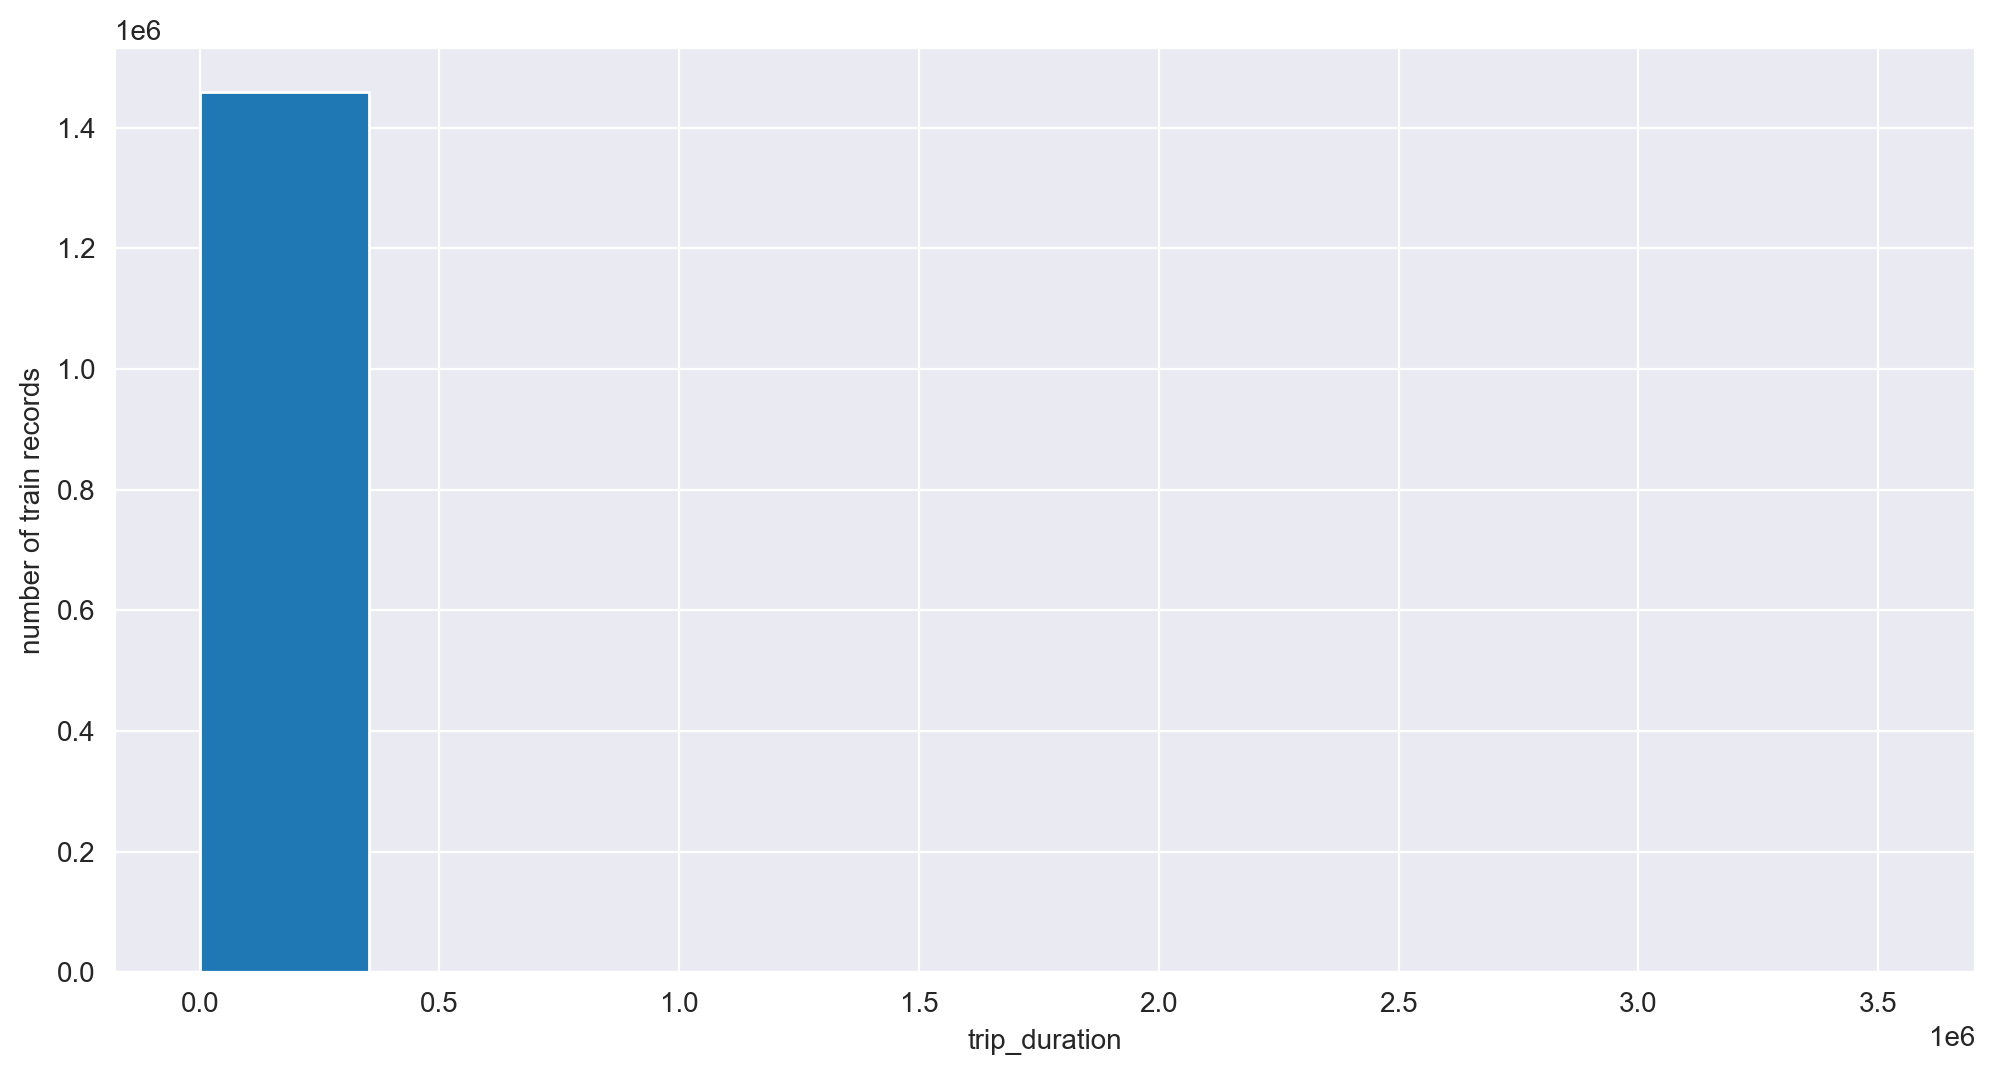

In [1477]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(train['trip_duration'].values, bins=10)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()


**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Все значения сконцентрированы в примерно одном месте.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Ответ тут достаточно прост, по факту, при таком распределении нас будет интересовать информация о том, на сколько порядков отличаются наши значения. 

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, выразим $y_i$:

$$y_i = \exp(\hat{y}_i) - 1$$

Теперь подставим наши значения $\hat{a}$ и $\hat{y}_i$ в RMSLE:

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}\big)^2} = \text{RMSE}(X, \hat{y}, \hat{a})$$

Утверждения верно и в обратную сторону, так как все переходы эквивалентны. $\blacksquare$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

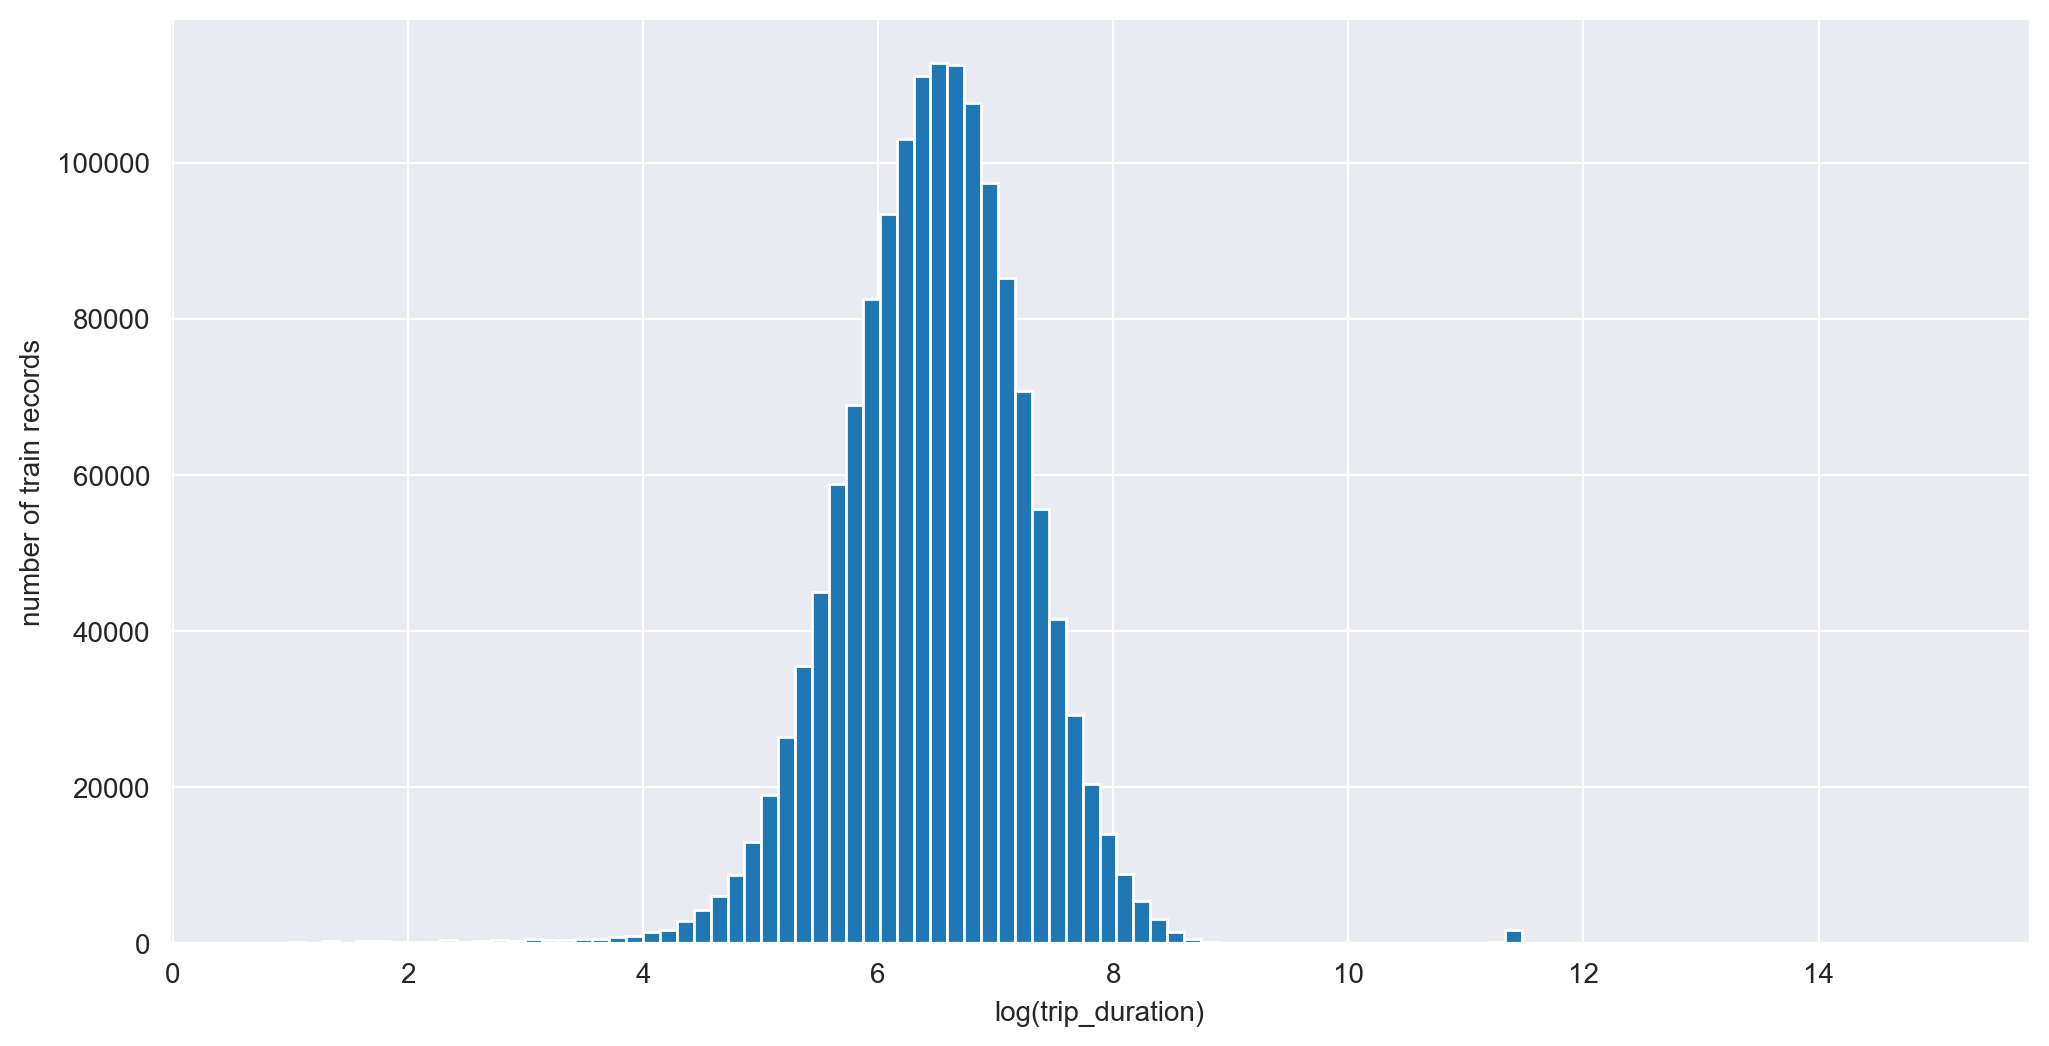

In [1478]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['log_trip_duration'] = np.log1p(train['trip_duration'].values)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [1479]:
def rmsle(log1p_y_true, log1p_y_pred):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    error = (log1p_y_true - log1p_y_pred) ** 2
    return np.sqrt(np.mean(error))
    # raise NotImplementedError

rmsle_best_const = rmsle(train['log_trip_duration'].values, [train['log_trip_duration'].mean()] * len(train['log_trip_duration'].values))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

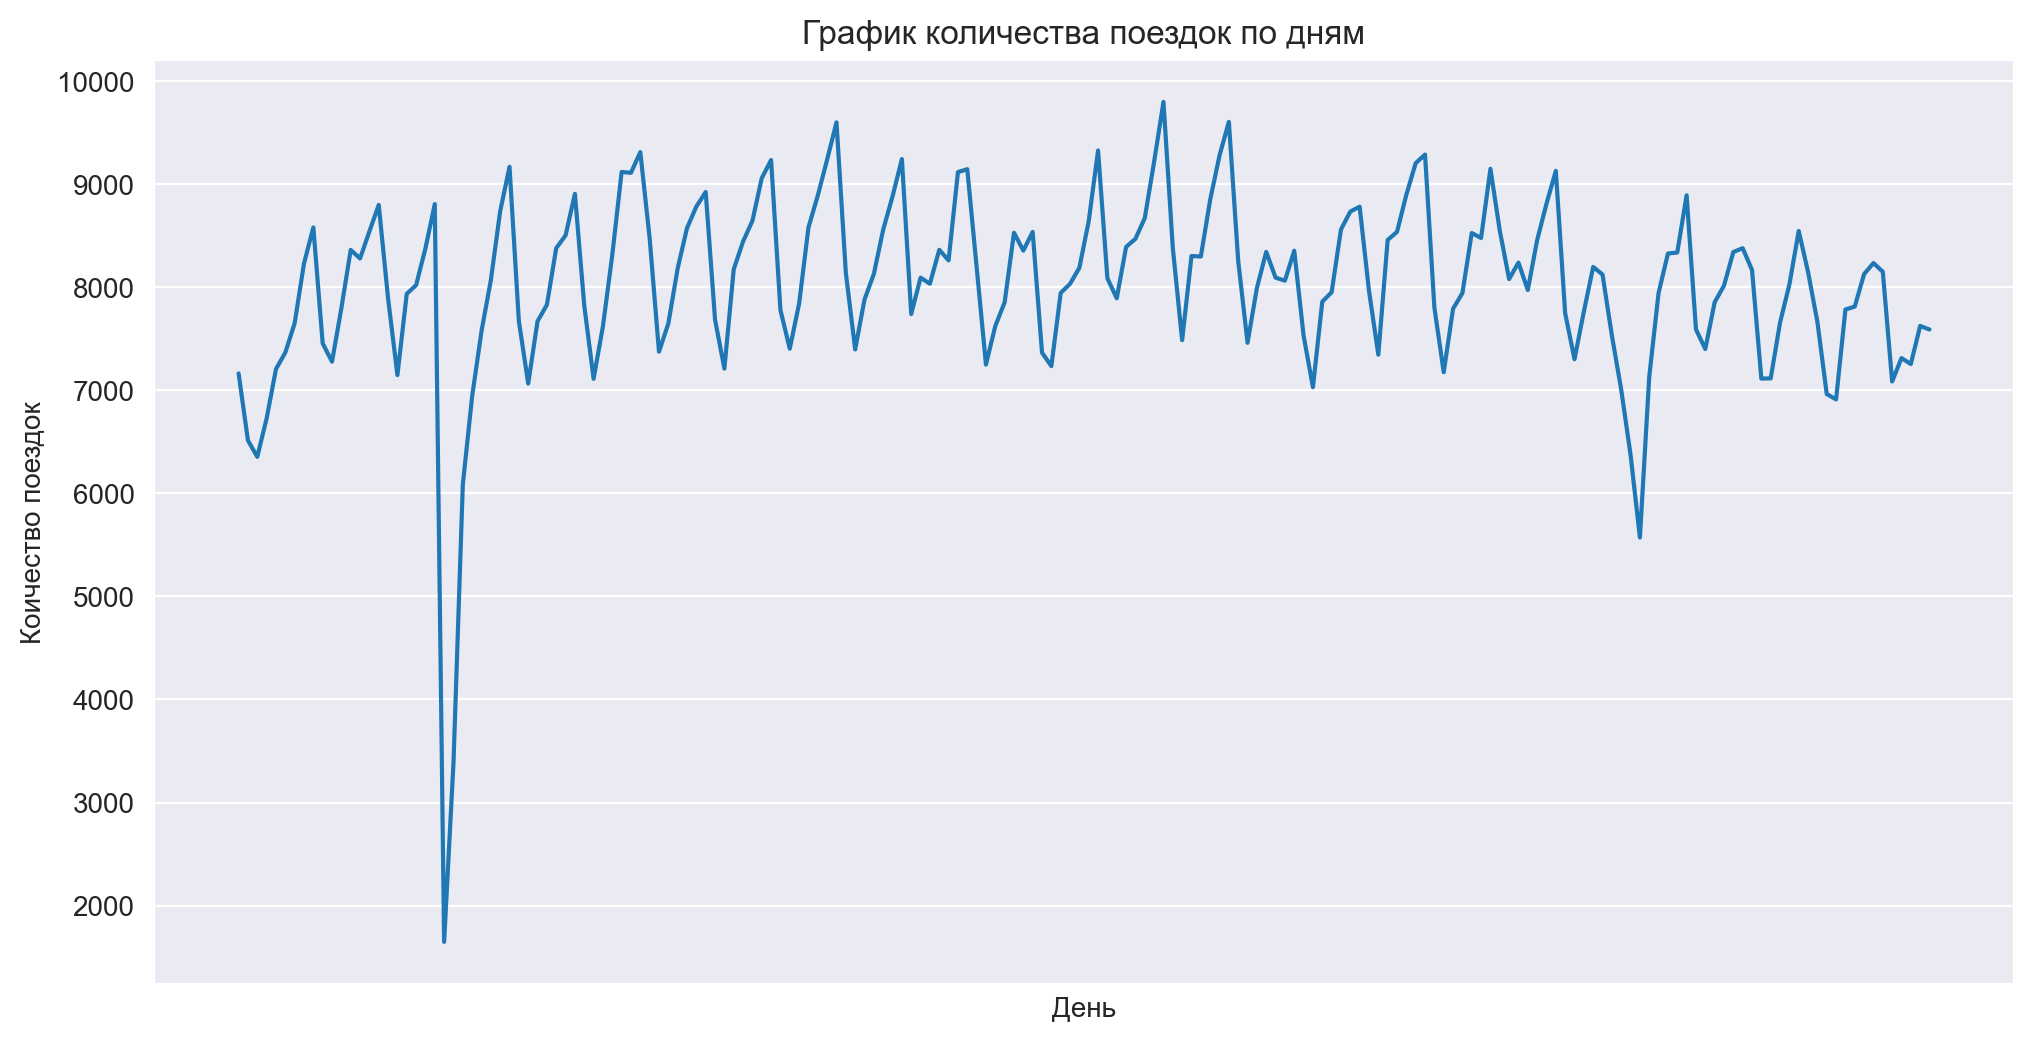

In [1480]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['day'] = train['pickup_datetime'].dt.day_of_year
table = train.groupby('day')['passenger_count'].count()
fig, ax = plt.subplots()
ax.plot(table)
ax.axes.xaxis.set_ticks([])
ax.set_xlabel('День')
ax.set_ylabel('Коичество поездок')
plt.xticks(rotation=45)
plt.title('График количества поездок по дням')
plt.show()

In [1481]:
table[table < 6000]

day
23     1648
24     3383
151    5570
Name: passenger_count, dtype: int64

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

2016-01-23 и 2016-01-24 была снежная буря и все дороги были перекрыты. 2016-05-30 произошли какие-то терракты или что-то в этом духе.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

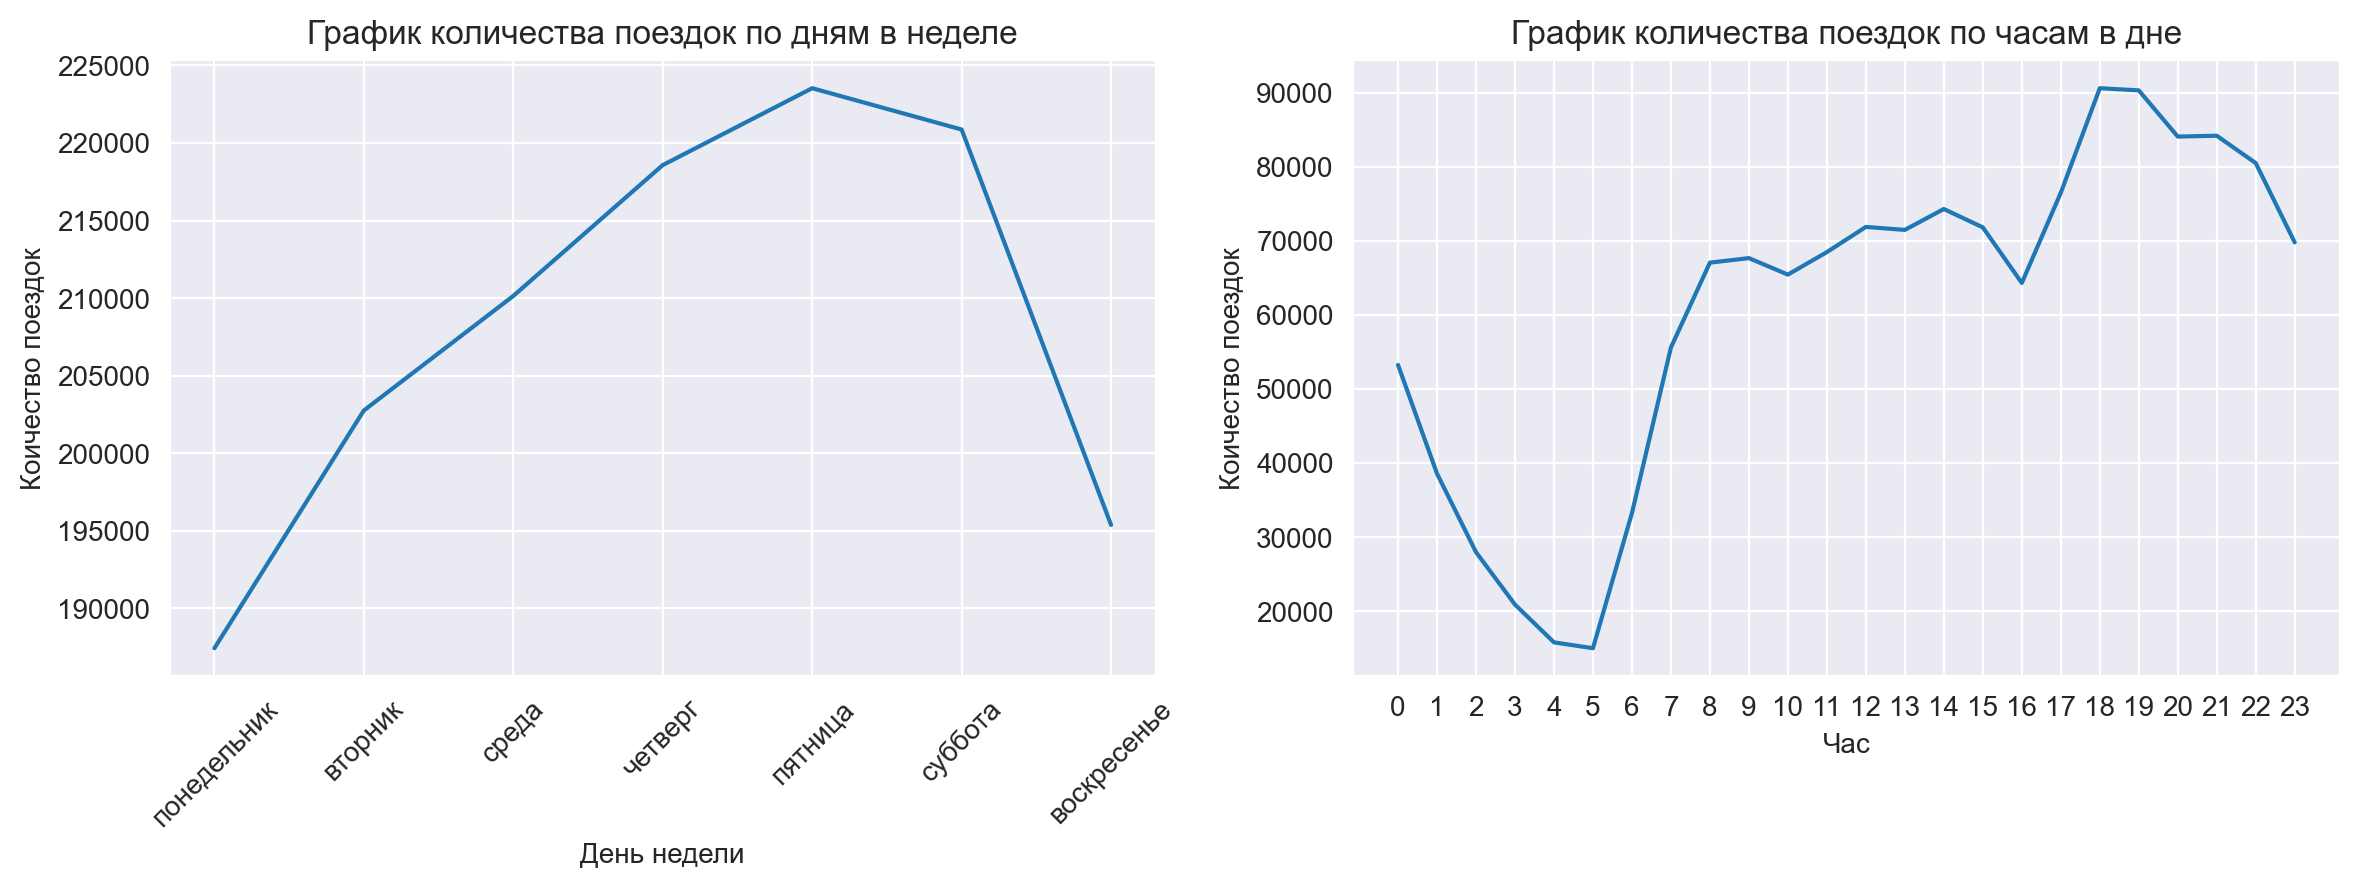

In [1482]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# ntrain = train.copy(deep=True)
train['day_of_week'] = train['pickup_datetime'].dt.day_of_week
table = train.groupby('day_of_week')['passenger_count'].count()
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
ax[0].set_title('График количества поездок по дням в неделе')
ax[0].set_xticks(np.arange(7), labels=['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье'], rotation=45)
ax[0].plot(table)
ax[0].set_xlabel('День недели')
ax[0].set_ylabel('Коичество поездок')
train['hour'] = pd.to_numeric(train['pickup_datetime'].dt.strftime('%H'))
table = train.groupby('hour')['passenger_count'].count()
ax[1].set_title('График количества поездок по часам в дне')
ax[1].set_xticks(range(24))
ax[1].plot(table)
ax[1].set_xlabel('Час')
ax[1].set_ylabel('Коичество поездок')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

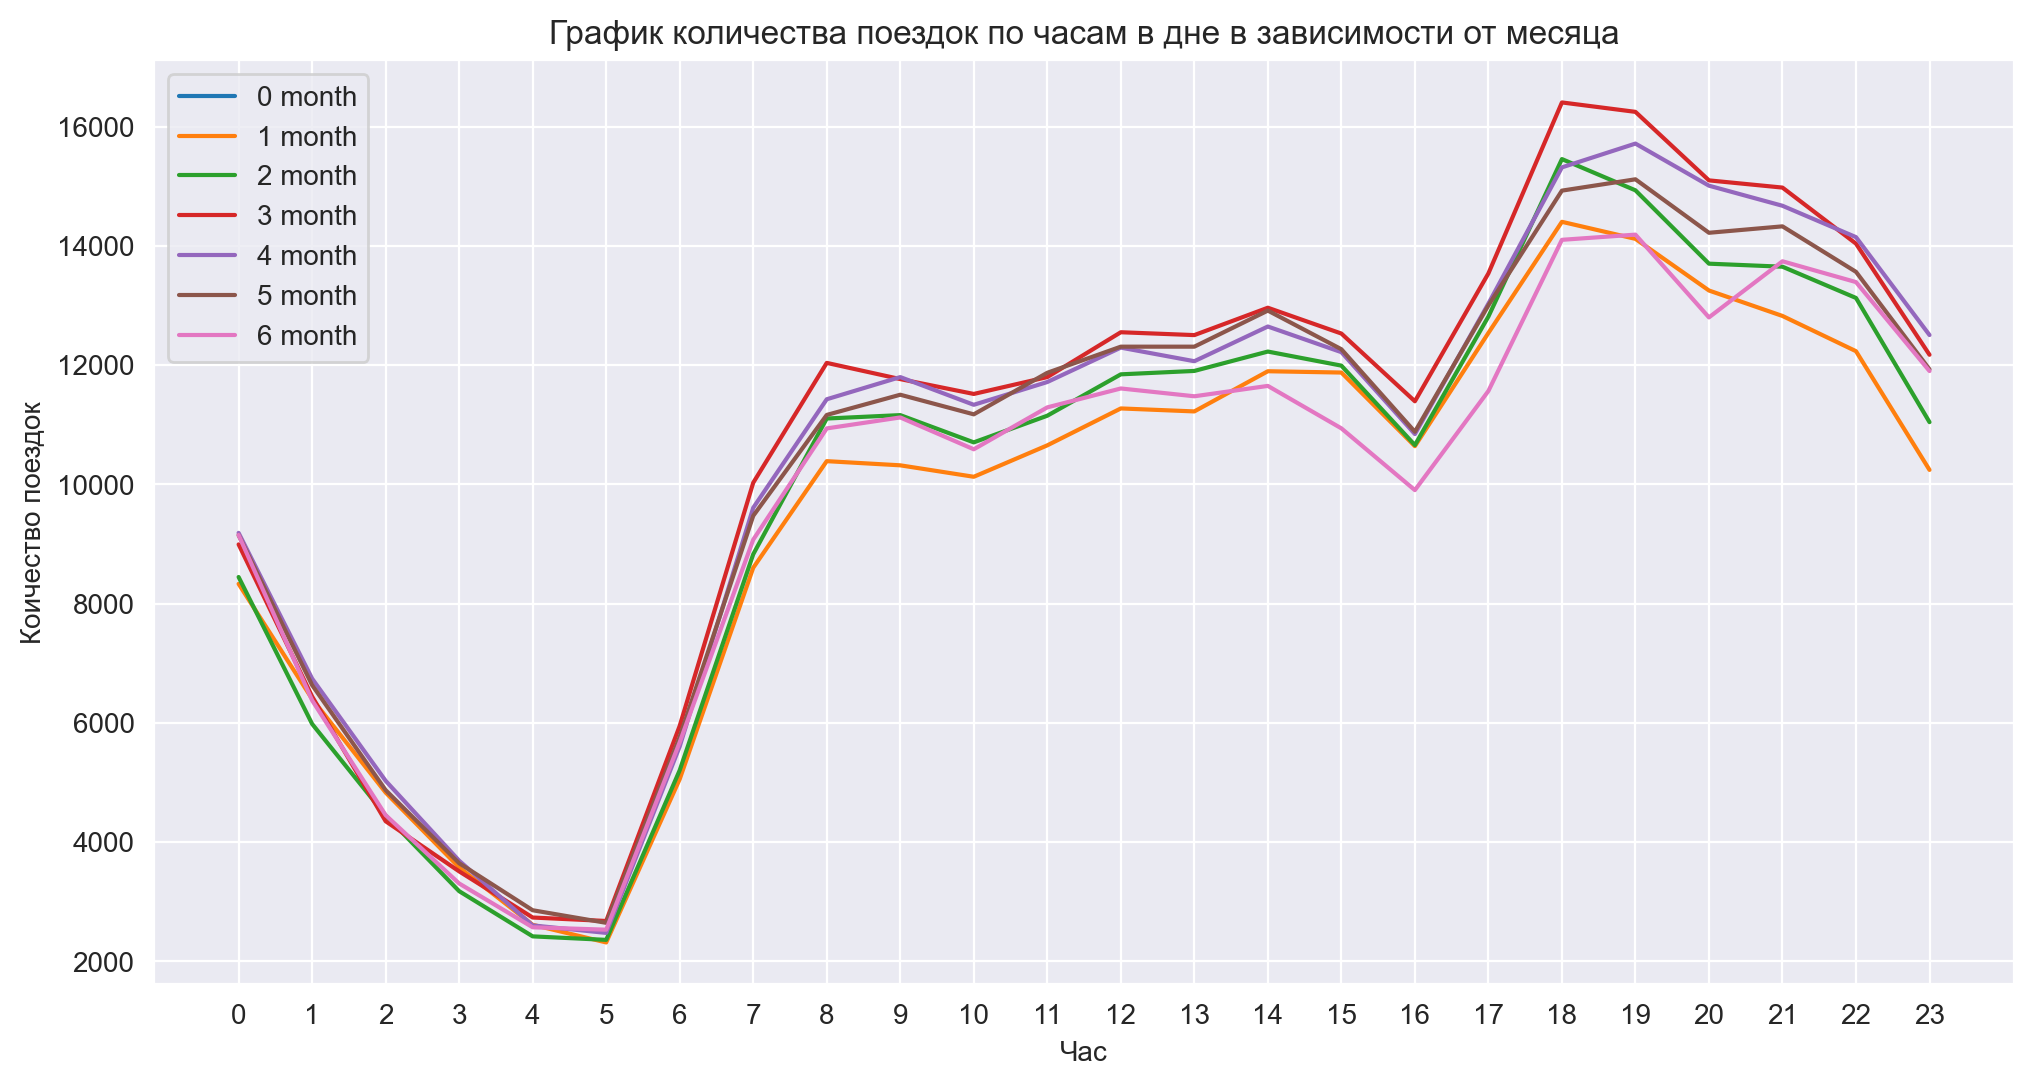

In [1483]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['month'] = pd.to_numeric(train['pickup_datetime'].dt.strftime('%m'))
for x in range(7):
    plt.plot(train[train['month'] == x].groupby('hour')['passenger_count'].count(), label=f'{x} month')
plt.title('График количества поездок по часам в дне в зависимости от месяца')
plt.xlabel('Час')
plt.ylabel('Коичество поездок')
plt.xticks(range(24))
plt.legend()
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

На удивление, меньше всего поездок именно в понедельник, а больше всего --- в пятницу. По месяцам особо показатели не меняются. А вот по часам действительно можно сказать, что в 18:00 --- часпик, поэтому всегда поездок больше. А вот ближе к 5:00 люди уже спят, или только просыпаются, поэтому поездок минимальное количество.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

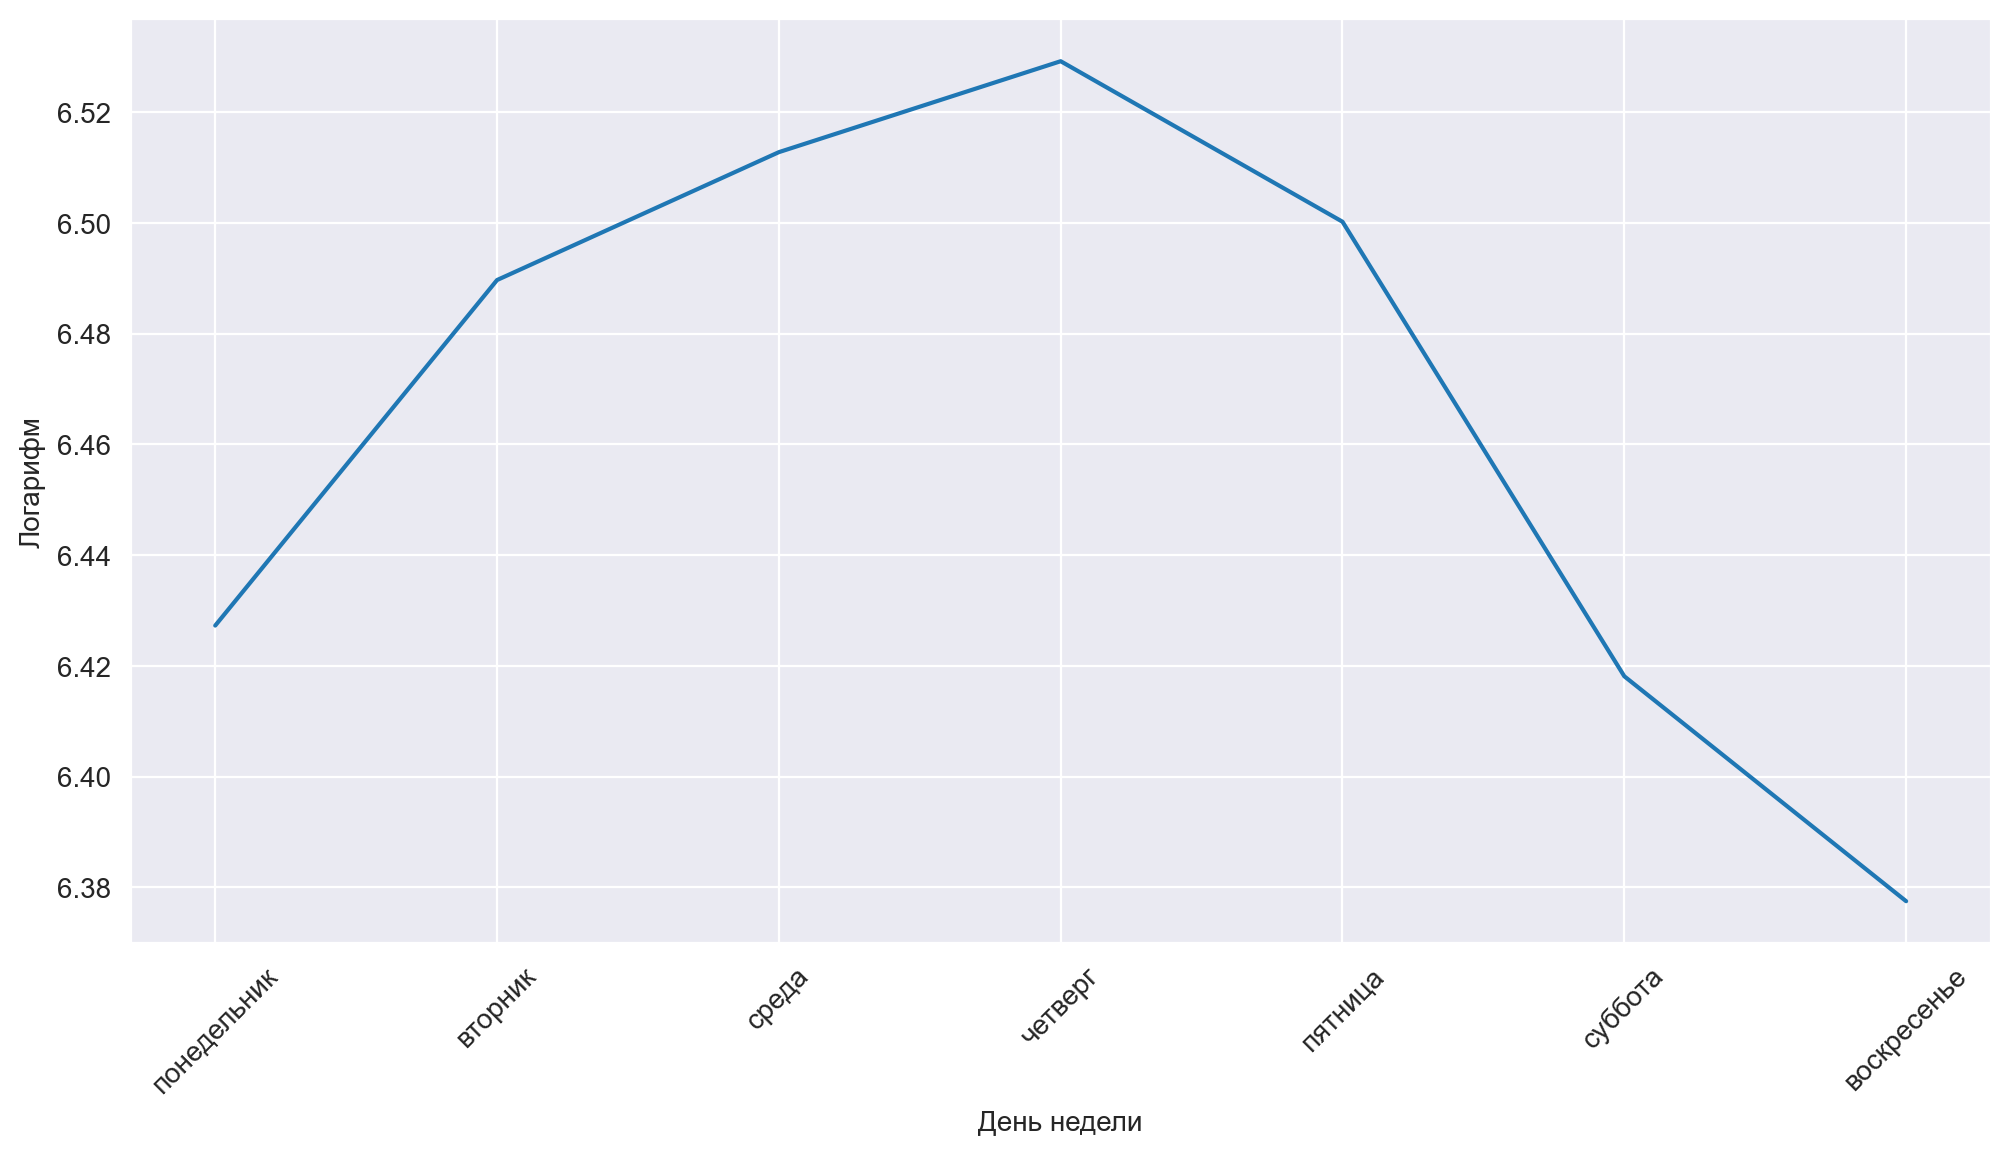

In [1484]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

train['is_anomal_1'] = 0
train.loc[train[train['day'] == '2016-01-23'].index, 'is_anomal'] = 1
train['is_anomal_2'] = 0
train.loc[train[train['day'] == '2016-01-24'].index, 'is_anomal'] = 1

train_sample, test_sample = train_test_split(train, test_size=0.3, train_size=0.7, random_state=10)
plt.xticks(np.arange(7), labels=['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье'], rotation=45)
plt.plot(train_sample.groupby('day_of_week')['log_trip_duration'].mean())
plt.xlabel('День недели')
plt.ylabel('Логарифм')
plt.show()

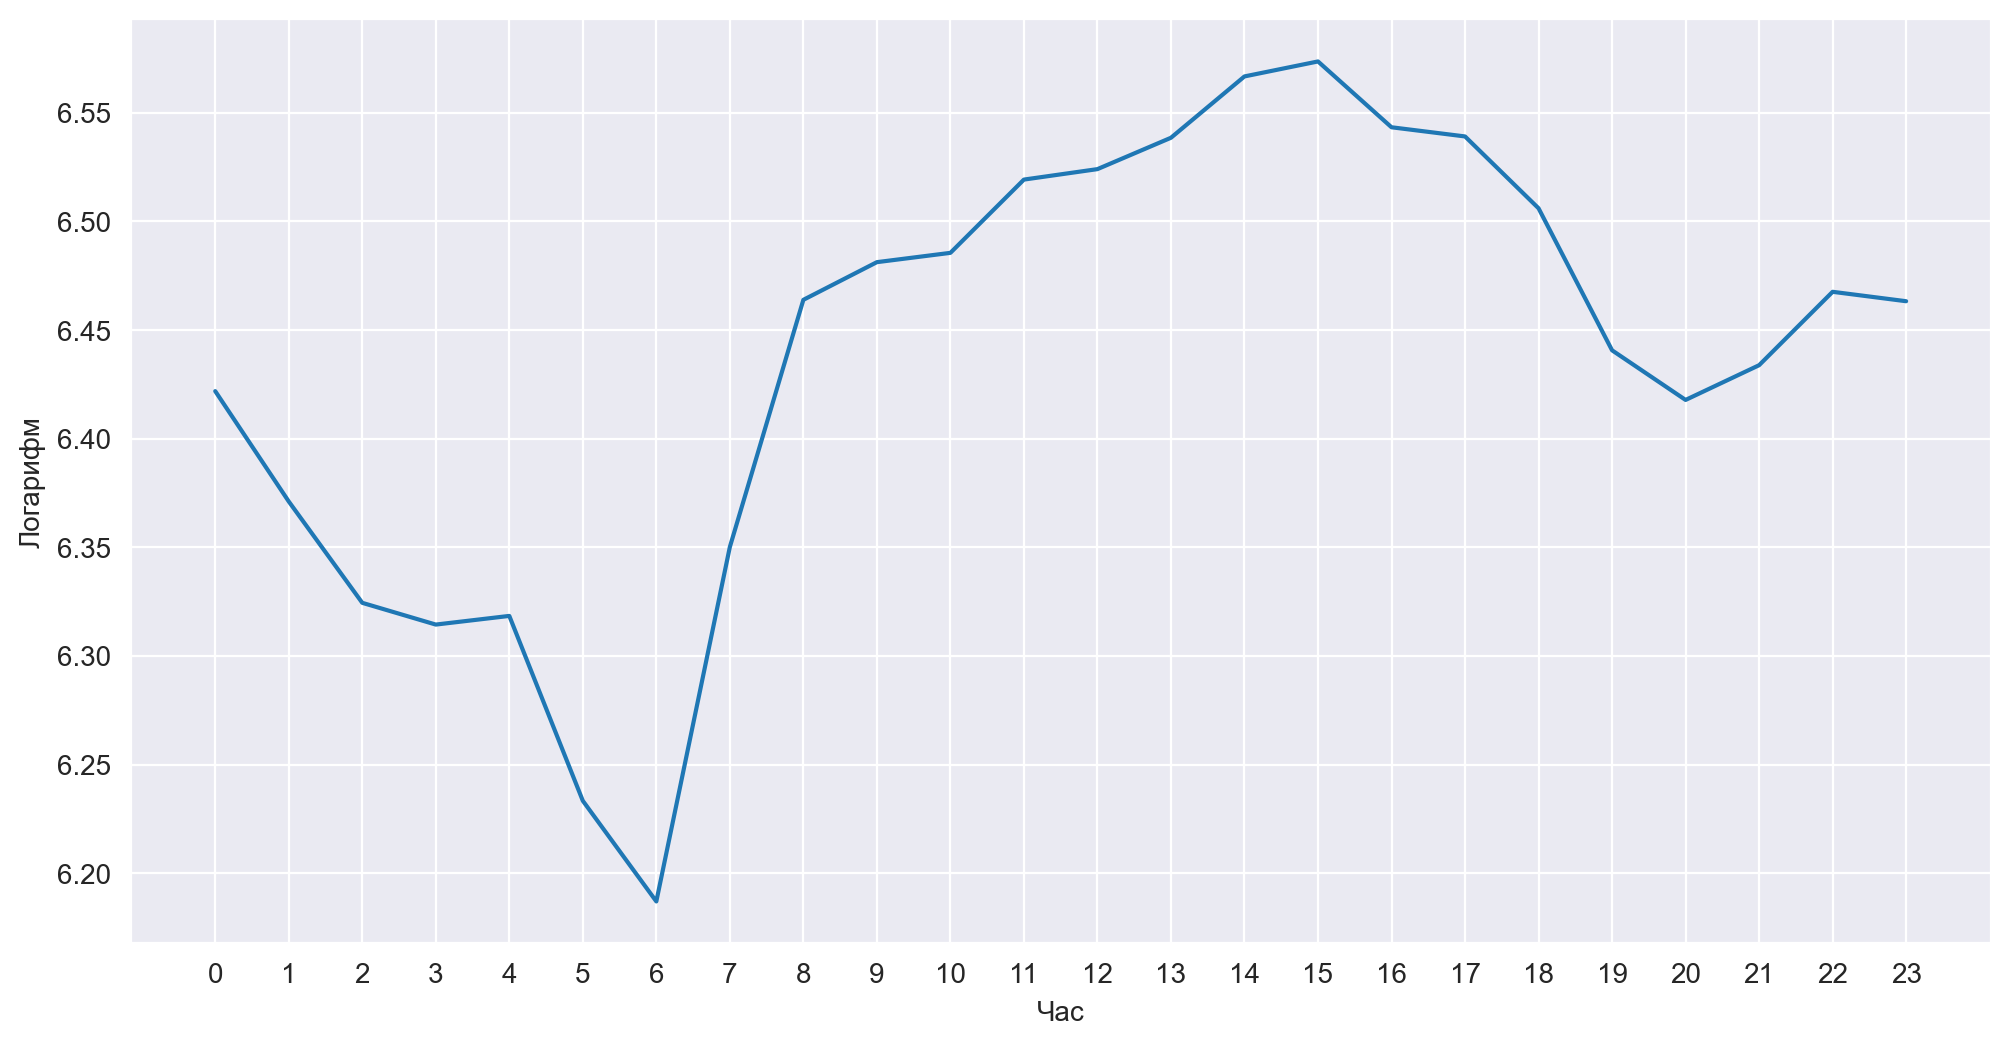

In [1485]:
plt.plot(train_sample.groupby('hour')['log_trip_duration'].mean())
plt.xlabel('Час')
plt.ylabel('Логарифм')
plt.xticks(range(24))
plt.show()

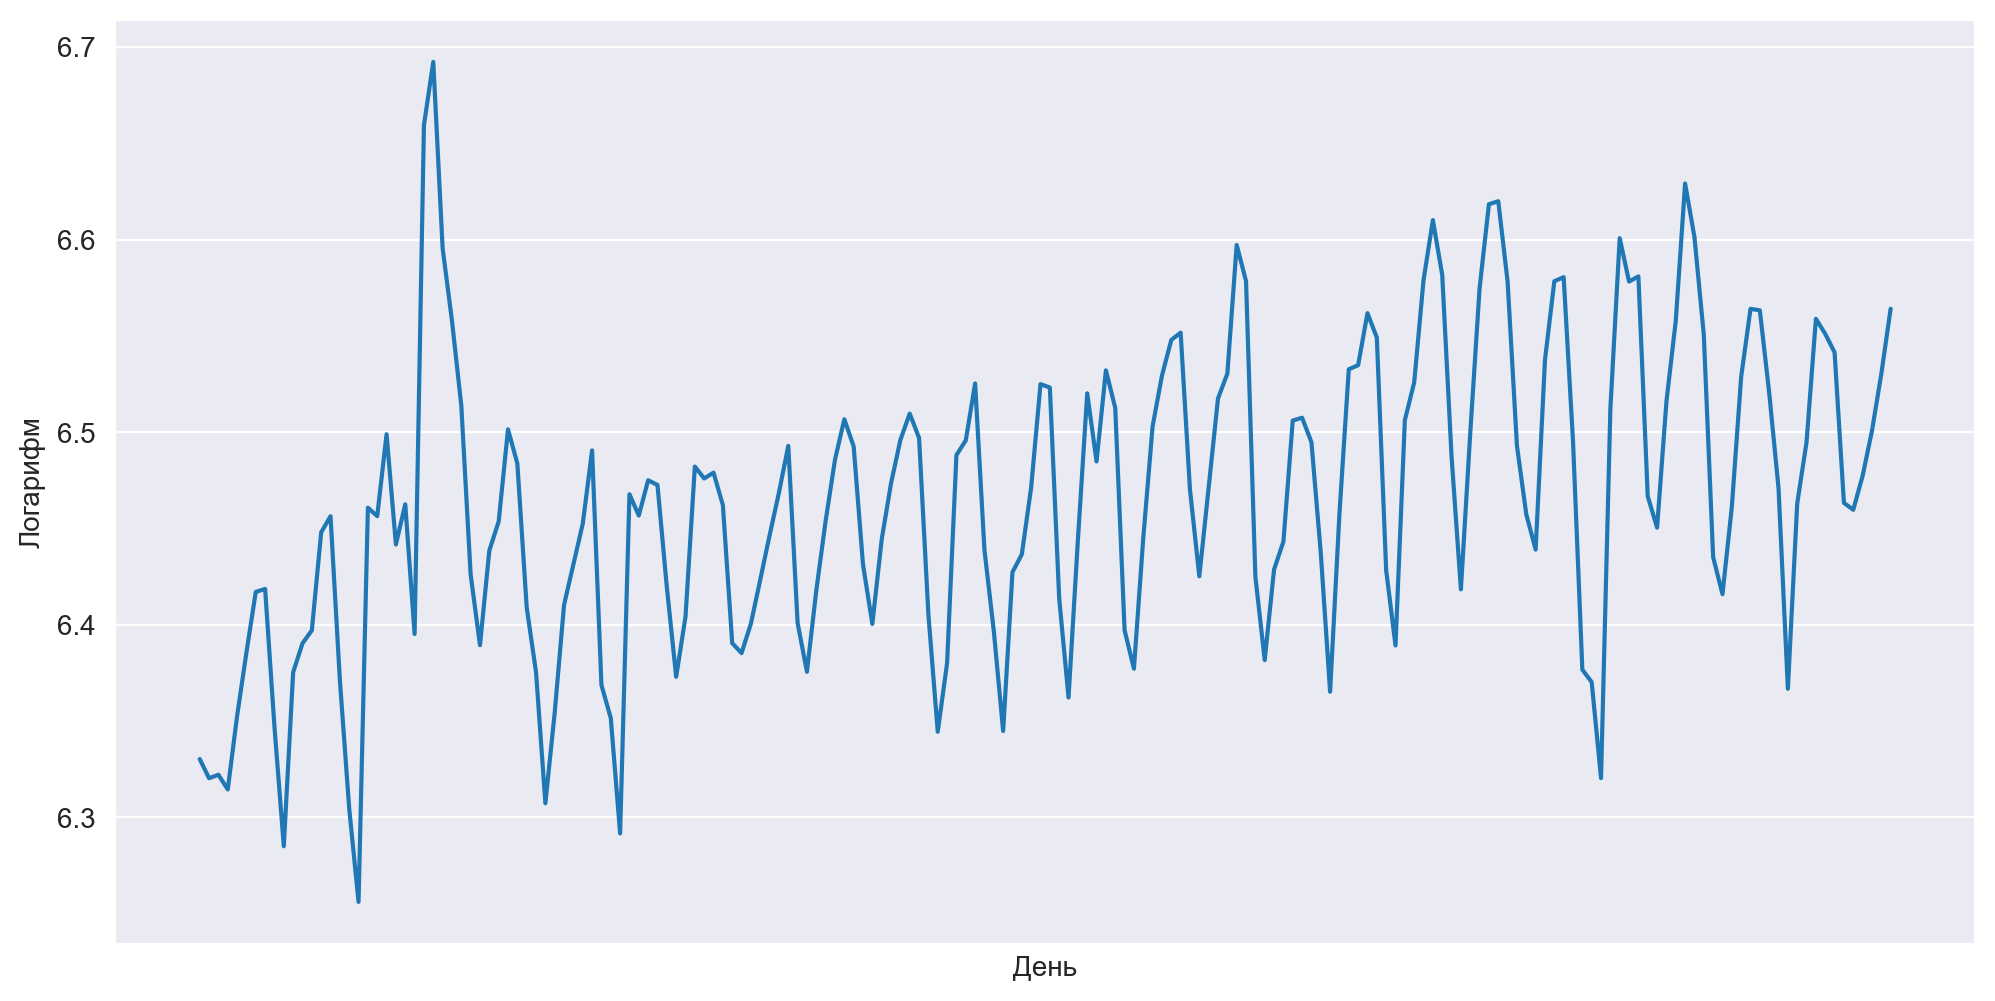

In [1486]:
plt.plot(train_sample.groupby('day')['log_trip_duration'].mean())
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.xlabel('День')
plt.ylabel('Логарифм')
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Да, слегка похожь, только как будто смещён или перевернут. Эти два аномальных периода теперь самые большие значения имеют. Тренда особого в графике не наблюдаю, конечно некая периодичность есть, но ничено более сказать не могу. 

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [1487]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train_sample[['day', 'is_anomal_1', 'is_anomal_2', 'hour']].copy(deep=True)
y_train = train_sample['log_trip_duration']
X_test = test_sample[['day', 'is_anomal_1', 'is_anomal_2', 'hour']].copy(deep=True)
y_test = test_sample['log_trip_duration']

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [1488]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

x = OneHotEncoder().fit_transform(train_sample[['month', 'day_of_week']]).toarray().T
X_train['Jan'], X_train['Feb'], X_train['Mar'], X_train['Apr'], X_train['May'], X_train['Jun'], X_train['Mon'], X_train['Tue'], X_train['Wed'], X_train['Thu'], X_train['Fri'], X_train['Sat'], X_train['Sun'] = x
x = OneHotEncoder().fit_transform(test_sample[['month', 'day_of_week']]).toarray().T
X_test['Jan'], X_test['Feb'], X_test['Mar'], X_test['Apr'], X_test['May'], X_test['Jun'], X_test['Mon'], X_test['Tue'], X_test['Wed'], X_test['Thu'], X_test['Fri'], X_test['Sat'], X_test['Sun'] = x

X_train['day'] = StandardScaler().fit_transform(X_train[['day']])
X_train['hour'] = StandardScaler().fit_transform(X_train[['hour']])
X_test['day'] = StandardScaler().fit_transform(X_test[['day']])
X_test['hour'] = StandardScaler().fit_transform(X_test[['hour']])

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("RMSLE on test sample:", rmsle(y_test, y_pred))
print("RMSLE on train sample:", rmsle(y_train, y_train_pred))
print("Best RMSLE const:", rmsle_best_const)

RMSLE on test sample: 0.7911544373124559
RMSLE on train sample: 0.7932548281851034
Best RMSLE const: 0.7957592365411509


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [1489]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [1490]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
t = train.sample(1000)
your_lat_values = t['pickup_latitude']
your_lon_values = t['pickup_longitude']

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Ну, это наверное аэропорты.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [1491]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

# train['haversine'] = haversine_array(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
train_sample['haversine'] = haversine_array(train_sample['pickup_latitude'], train_sample['pickup_longitude'], train_sample['dropoff_latitude'], train_sample['dropoff_longitude'])
test_sample['haversine'] = haversine_array(test_sample['pickup_latitude'], test_sample['pickup_longitude'], test_sample['dropoff_latitude'], test_sample['dropoff_longitude'])

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [1492]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_sample['log_haversine'] = np.log1p(train_sample['haversine'])
test_sample['log_haversine'] = np.log1p(test_sample['haversine'])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [1530]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(train_sample[['log_haversine']].corrwith(train_sample['log_trip_duration']))
print(train_sample[['haversine']].corrwith(train_sample['log_trip_duration']))

log_haversine    0.767282
dtype: float64
haversine    0.675494
dtype: float64


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

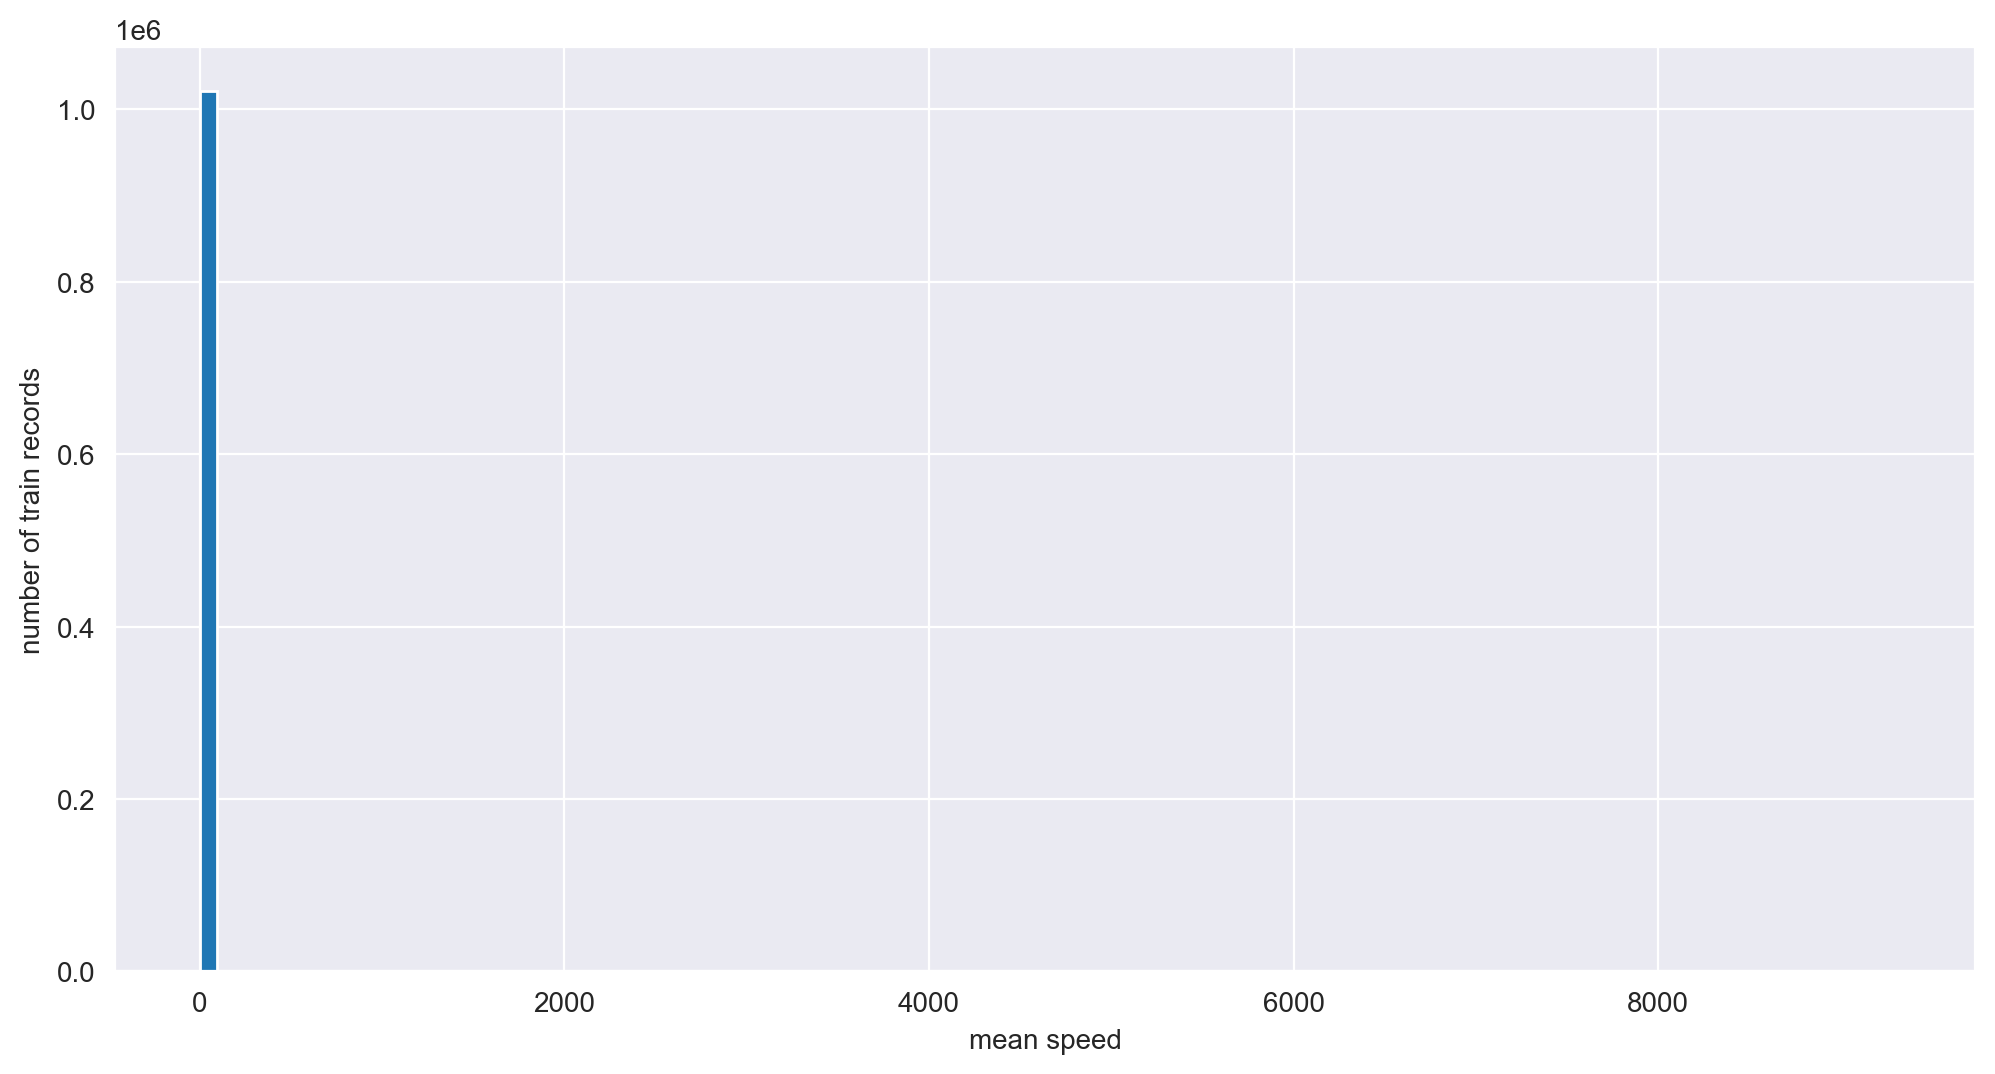

In [1494]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_sample['mean_speed'] = (train_sample['haversine'] / train_sample['trip_duration']) * 3600
plt.hist(train_sample['mean_speed'].values, bins=100)
plt.xlabel('mean speed')
plt.ylabel('number of train records')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

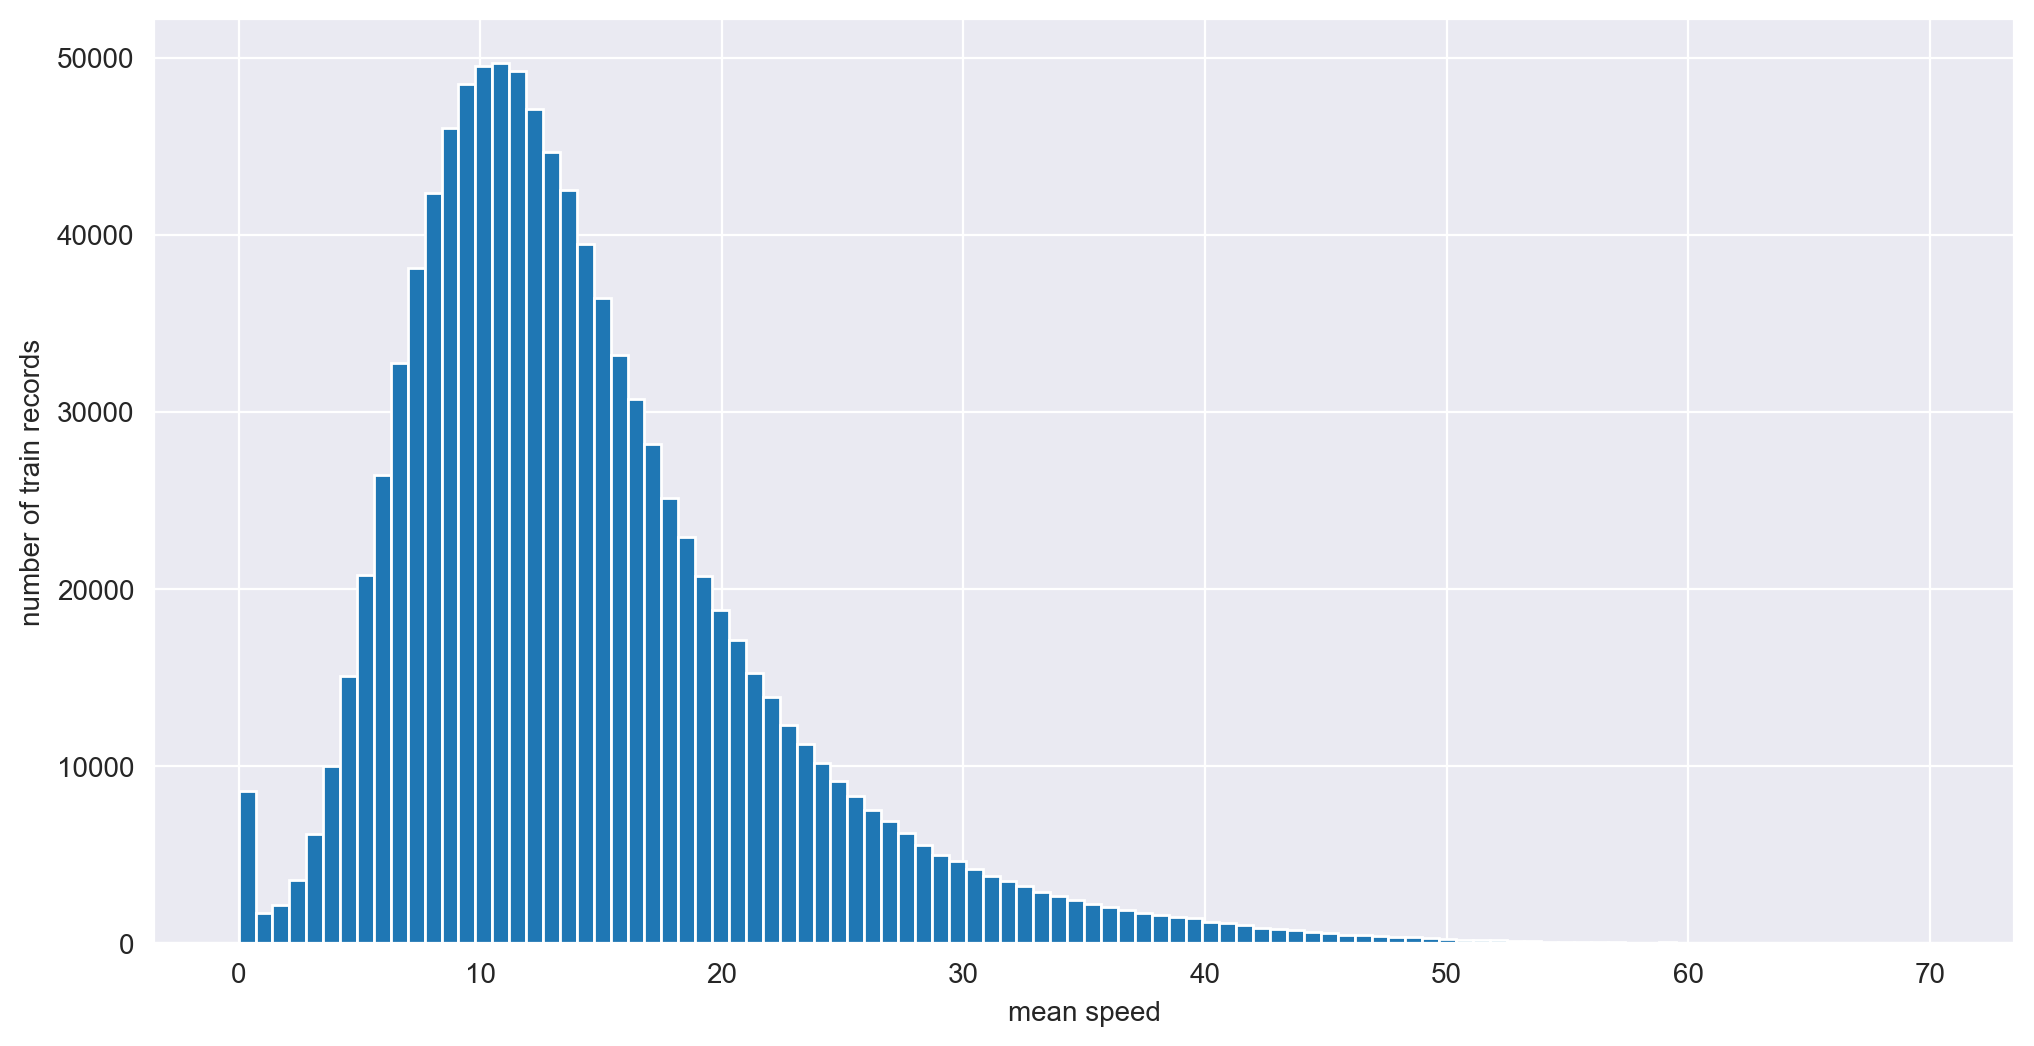

In [1495]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(train_sample[train_sample['mean_speed'] < 70]['mean_speed'].values, bins=100)
plt.xlabel('mean speed')
plt.ylabel('number of train records')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

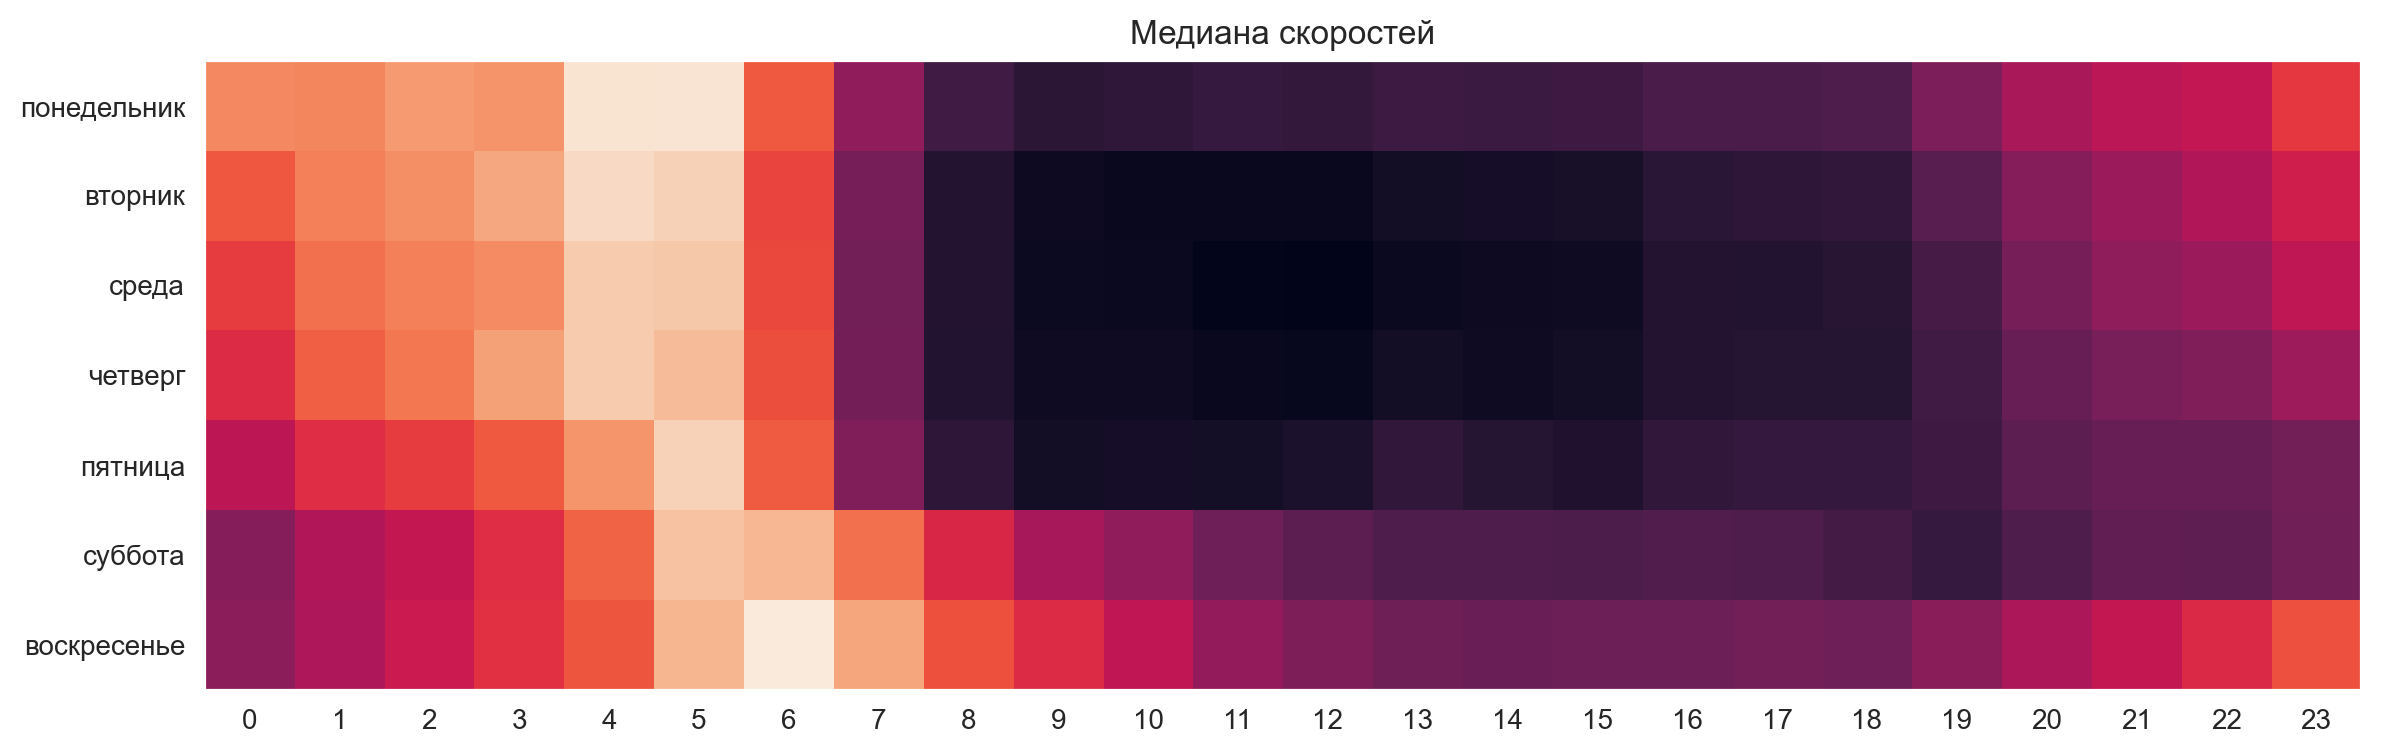

In [1496]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = np.array(train_sample.groupby(['day_of_week', 'hour'])['mean_speed'].median().values)
data = data.reshape(7, 24)
days = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
hours = list(range(24))

fig, ax = plt.subplots()
im = ax.imshow(data)
ax.grid(linewidth=0)
ax.set_xticks(np.arange(len(hours)), labels=hours)
ax.set_yticks(np.arange(len(days)), labels=days)

ax.set_title("Медиана скоростей")
fig.tight_layout()
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Среднюю скорость во время обучения нельзя использовать, потому что в ней сокрыт параметр, который мы хотим предсказывать.

In [1497]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
del train_sample['mean_speed']

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

С понедельника по пятницу с 8 до 19 корость минимальна, в субботу-воскресенье с 5 до 6 и в понедельник-пятницу с 4 до 5 скорость максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [1498]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_sample['traffic_jam'] = 0
train_sample.loc[train_sample[(train_sample['day_of_week'] <= 4) & (train_sample['hour'] <= 19) & ((train_sample['hour']) >= 8)].index, 'traffic_jam'] = 1
train_sample['free_road'] = 0
train_sample.loc[train_sample[(train_sample['day_of_week'] <= 4) & (train_sample['hour'] <= 5) & ((train_sample['hour']) >= 4)].index, 'free_road'] = 1
train_sample.loc[train_sample[(train_sample['day_of_week'] > 4) & (train_sample['hour'] <= 6) & ((train_sample['hour']) >= 5)].index, 'free_road'] = 1

test_sample['traffic_jam'] = 0
test_sample.loc[test_sample[(test_sample['day_of_week'] <= 4) & (test_sample['hour'] <= 19) & ((test_sample['hour']) >= 8)].index, 'traffic_jam'] = 1
test_sample['free_road'] = 0
test_sample.loc[test_sample[(test_sample['day_of_week'] <= 4) & (test_sample['hour'] <= 5) & ((test_sample['hour']) >= 4)].index, 'free_road'] = 1
test_sample.loc[test_sample[(test_sample['day_of_week'] > 4) & (test_sample['hour'] <= 6) & ((test_sample['hour']) >= 5)].index, 'free_road'] = 1

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [1499]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_sample['start_in_jfk'] = 0
train_sample.loc[train_sample[(train_sample['pickup_latitude'] <= 40.65) & (train_sample['pickup_latitude'] >= 40.62) & (train_sample['pickup_longitude'] <= -73.6) & (train_sample['pickup_longitude'] >= -73.8)].index, 'start_in_jfk'] = 1
train_sample['end_in_jfk'] = 0
train_sample.loc[train_sample[(train_sample['dropoff_latitude'] <= 40.65) & (train_sample['dropoff_latitude'] >= 40.62) & (train_sample['dropoff_longitude'] <= -73.6) & (train_sample['dropoff_longitude'] >= -73.8)].index, 'end_in_jfk'] = 1

train_sample['start_in_edo'] = 0
train_sample.loc[train_sample[(train_sample['pickup_latitude'] <= 40.78) & (train_sample['pickup_latitude'] >= 40.768) & (train_sample['pickup_longitude'] <= -73.86) & (train_sample['pickup_longitude'] >= -73.889)].index, 'start_in_edo'] = 1
train_sample['end_in_edo'] = 0
train_sample.loc[train_sample[(train_sample['dropoff_latitude'] <= 40.78) & (train_sample['dropoff_latitude'] >= 40.768) & (train_sample['dropoff_longitude'] <= -73.86) & (train_sample['dropoff_longitude'] >= -73.889)].index, 'end_in_edo'] = 1

test_sample['start_in_jfk'] = 0
test_sample.loc[test_sample[(test_sample['pickup_latitude'] <= 40.65) & (test_sample['pickup_latitude'] >= 40.62) & (test_sample['pickup_longitude'] <= -73.6) & (test_sample['pickup_longitude'] >= -73.8)].index, 'start_in_jfk'] = 1
test_sample['end_in_jfk'] = 0
test_sample.loc[test_sample[(test_sample['dropoff_latitude'] <= 40.65) & (test_sample['dropoff_latitude'] >= 40.62) & (test_sample['dropoff_longitude'] <= -73.6) & (test_sample['dropoff_longitude'] >= -73.8)].index, 'end_in_jfk'] = 1

test_sample['start_in_edo'] = 0
test_sample.loc[test_sample[(test_sample['pickup_latitude'] <= 40.78) & (test_sample['pickup_latitude'] >= 40.768) & (test_sample['pickup_longitude'] <= -73.86) & (test_sample['pickup_longitude'] >= -73.889)].index, 'start_in_edo'] = 1
test_sample['end_in_edo'] = 0
test_sample.loc[test_sample[(test_sample['dropoff_latitude'] <= 40.78) & (test_sample['dropoff_latitude'] >= 40.768) & (test_sample['dropoff_longitude'] <= -73.86) & (test_sample['dropoff_longitude'] >= -73.889)].index, 'end_in_edo'] = 1

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

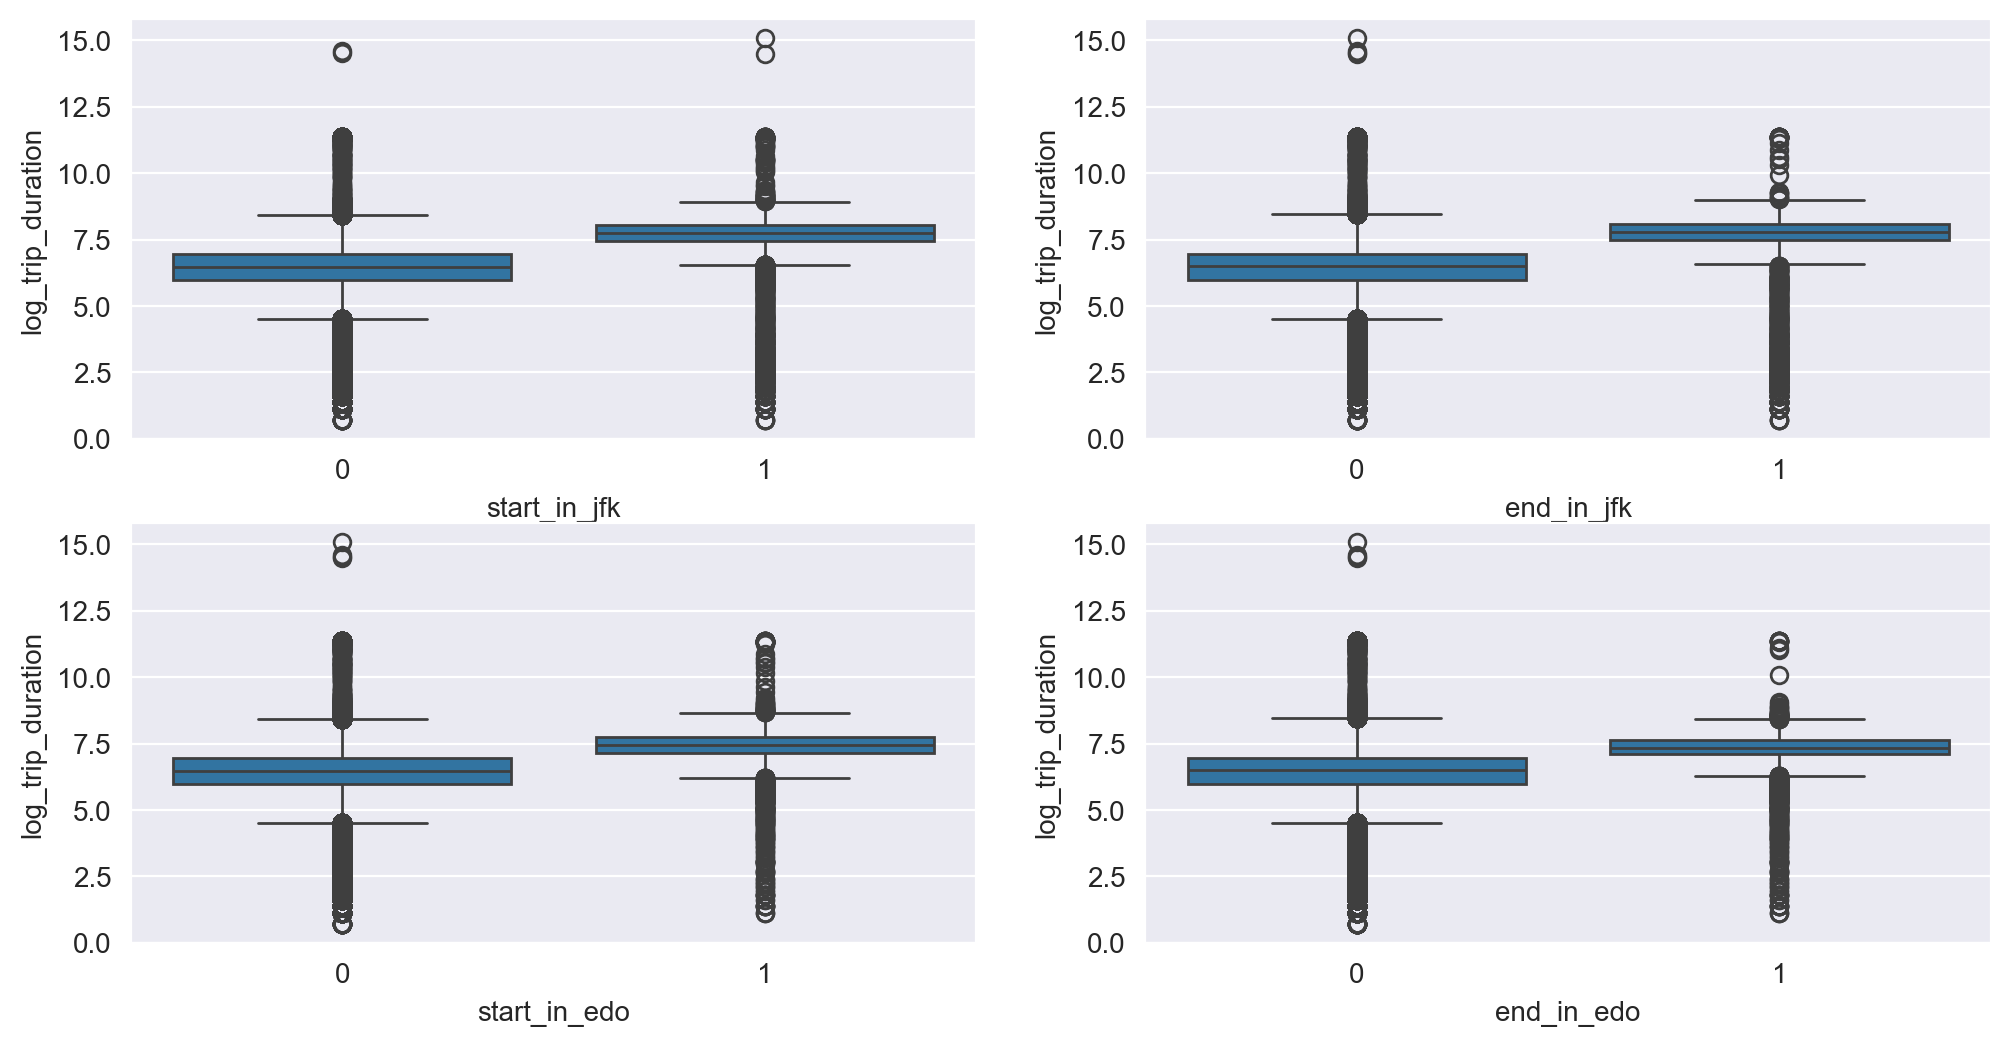

In [1500]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots(2, 2)

ax = plt.subplot(2, 2, 1)
sns.boxplot(train_sample, x='start_in_jfk', y='log_trip_duration')
ax = plt.subplot(2, 2, 2)
sns.boxplot(train_sample, x='end_in_jfk', y='log_trip_duration')
ax = plt.subplot(2, 2, 3)
sns.boxplot(train_sample, x='start_in_edo', y='log_trip_duration')
ax = plt.subplot(2, 2, 4)
sns.boxplot(train_sample, x='end_in_edo', y='log_trip_duration')
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [1501]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, left_down, right_down, left_up, right_up, n_cols, n_rows):
        # your code here
        self.left_down = left_down
        self.right_down = right_down
        self.left_up = left_up
        self.right_up = right_up
        self.n_cols = n_cols
        self.n_rows = n_rows
        self.cols = np.linspace(left_down[1], right_down[1], num=n_cols)
        self.rows = np.linspace(left_down[0], left_up[0], num=n_rows)
        # pass

    def show_map(self):
        # you may want to visualize cells
        pass

    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        # your code here
        sample = X.copy(deep=True)
        sample['pickup_col'] = np.searchsorted(self.cols, X['pickup_longitude'])
        sample['pickup_row'] = np.searchsorted(self.rows, X['pickup_latitude'])
        sample['pickup_box'] = self.n_cols * (sample['pickup_row'] - 1) + sample['pickup_col']
        sample['dropoff_col'] = np.searchsorted(self.cols, X['dropoff_longitude'])
        sample['dropoff_row'] = np.searchsorted(self.rows, X['dropoff_latitude'])
        sample['dropoff_box'] = self.n_cols * (sample['dropoff_row'] - 1) + sample['dropoff_col']
        sample.loc[(sample['pickup_col'] < 1) | (sample['pickup_col'] > self.n_cols) | (sample['pickup_row'] < 1) | (sample['pickup_row'] > self.n_rows), 'pickup_box'] = -1
        sample.loc[(sample['dropoff_col'] < 1) | (sample['dropoff_col'] > self.n_rows) | (sample['dropoff_row'] < 1) | (sample['dropoff_row'] > self.n_rows), 'dropoff_box'] = -1
        del sample['pickup_col']
        del sample['pickup_row']
        del sample['dropoff_col']
        del sample['dropoff_row']
        return sample

In [1502]:
left_up = (40.798212, -74.016656)
right_up = (40.797827, -73.931520)
right_down = (40.700386, -73.933694)
left_down = (40.699859, -74.019577)
train_sample = MapGridTransformer(left_down, right_down, left_up, right_up, 3, 4).transform(train_sample)
test_sample = MapGridTransformer(left_down, right_down, left_up, right_up, 3, 4).transform(test_sample)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [1503]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Ridge

X_train = train_sample[['day', 'is_anomal_1', 'is_anomal_2', 'hour', 'start_in_jfk', 'end_in_jfk', 'start_in_edo', 'end_in_edo', 'traffic_jam', 'free_road', 'log_haversine']].copy(deep=True)
y_train = train_sample['log_trip_duration']
X_test = test_sample[['day', 'is_anomal_1', 'is_anomal_2', 'hour', 'start_in_jfk', 'end_in_jfk', 'start_in_edo', 'end_in_edo', 'traffic_jam', 'free_road', 'log_haversine']].copy(deep=True)
y_test = test_sample['log_trip_duration']

x = OneHotEncoder().fit_transform(train_sample[['month', 'day_of_week', 'pickup_box', 'dropoff_box']]).toarray().T
X_train['Jan'], X_train['Feb'], X_train['Mar'], X_train['Apr'], X_train['May'], X_train['Jun'], X_train['Mon'], X_train['Tue'], X_train['Wed'], X_train['Thu'], X_train['Fri'], X_train['Sat'], X_train['Sun'], \
    X_train['pickup_box_0'], X_train['pickup_box_1'], X_train['pickup_box_2'], X_train['pickup_box_3'], X_train['pickup_box_4'], X_train['pickup_box_5'], X_train['pickup_box_6'], X_train['pickup_box_7'], X_train['pickup_box_8'], X_train['pickup_box_9'], X_train['pickup_box_10'], \
        X_train['pickup_box_11'], X_train['pickup_box_12'], \
            X_train['dropoff_box_0'], X_train['dropoff_box_1'], X_train['dropoff_box_2'], X_train['dropoff_box_3'], X_train['dropoff_box_4'], X_train['dropoff_box_5'], X_train['dropoff_box_6'], X_train['dropoff_box_7'], X_train['dropoff_box_8'], X_train['dropoff_box_9'], X_train['dropoff_box_10'], \
                X_train['dropoff_box_11'], X_train['dropoff_box_12'] = x
x = OneHotEncoder().fit_transform(test_sample[['month', 'day_of_week', 'pickup_box', 'dropoff_box']]).toarray().T
X_test['Jan'], X_test['Feb'], X_test['Mar'], X_test['Apr'], X_test['May'], X_test['Jun'], X_test['Mon'], X_test['Tue'], X_test['Wed'], X_test['Thu'], X_test['Fri'], X_test['Sat'], X_test['Sun'], \
    X_test['pickup_box_0'], X_test['pickup_box_1'], X_test['pickup_box_2'], X_test['pickup_box_3'], X_test['pickup_box_4'], X_test['pickup_box_5'], X_test['pickup_box_6'], X_test['pickup_box_7'], X_test['pickup_box_8'], X_test['pickup_box_9'], X_test['pickup_box_10'], \
        X_test['pickup_box_11'], X_test['pickup_box_12'], \
            X_test['dropoff_box_0'], X_test['dropoff_box_1'], X_test['dropoff_box_2'], X_test['dropoff_box_3'], X_test['dropoff_box_4'], X_test['dropoff_box_5'], X_test['dropoff_box_6'], X_test['dropoff_box_7'], X_test['dropoff_box_8'], X_test['dropoff_box_9'], X_test['dropoff_box_10'], \
                X_test['dropoff_box_11'], X_test['dropoff_box_12'], = x

X_train['day'] = StandardScaler().fit_transform(X_train[['day']])
X_train['hour'] = StandardScaler().fit_transform(X_train[['hour']])
X_test['day'] = StandardScaler().fit_transform(X_test[['day']])
X_test['hour'] = StandardScaler().fit_transform(X_test[['hour']])

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("RMSLE on test sample:", rmsle(y_test, y_pred))
print("RMSLE on train sample:", rmsle(y_train, y_train_pred))
print("Best RMSLE const:", rmsle_best_const)

RMSLE on test sample: 0.4788417270076319
RMSLE on train sample: 0.480672665665858
Best RMSLE const: 0.7957592365411509


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Ну, с passenger_count всё понятно, там несколько человек в одну и ту же точку могут приехать. vender_id, они с разной скоростью вести могут. 

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [1504]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(train['vendor_id'].value_counts().count())
print(train['passenger_count'].value_counts().count())
print(train['store_and_fwd_flag'].value_counts().count())

2
10
2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

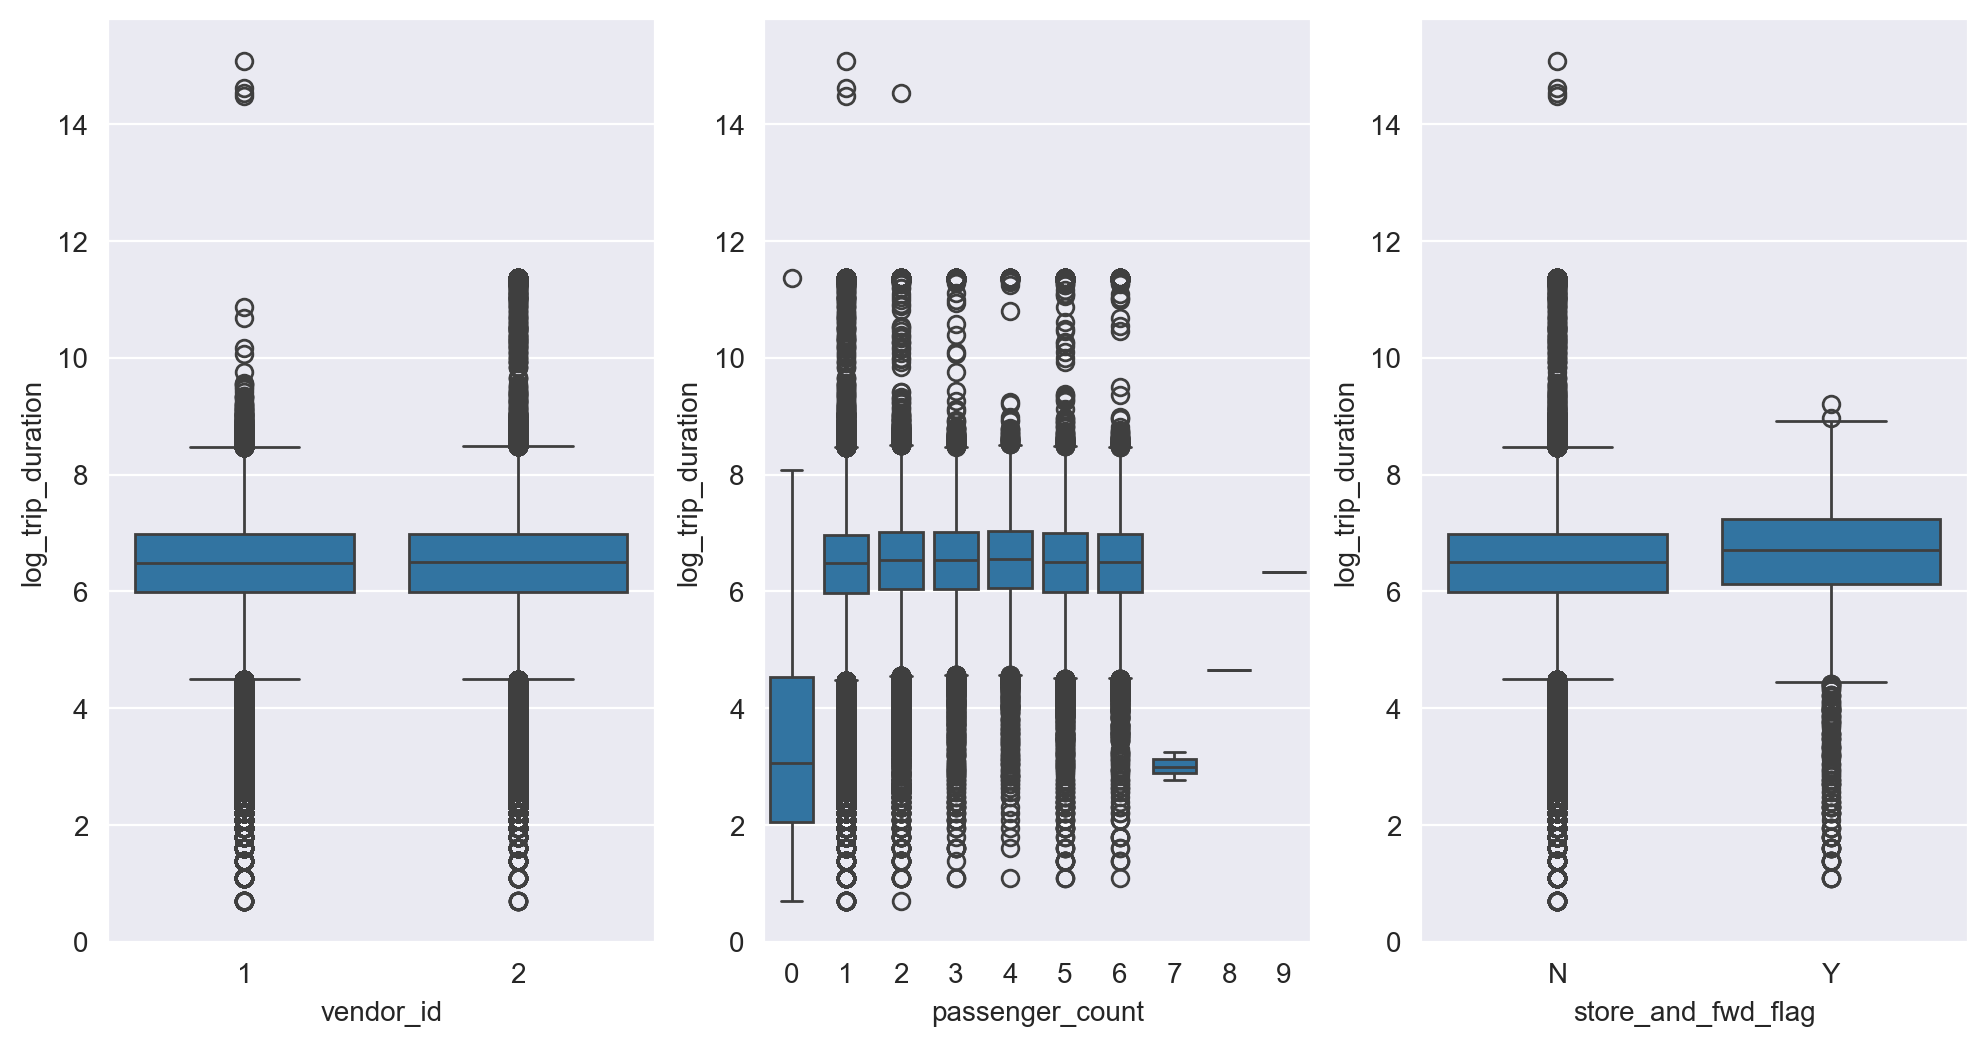

In [1505]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots(1, 3)

ax = plt.subplot(1, 3, 1)
sns.boxplot(train, x='vendor_id', y='log_trip_duration')
ax = plt.subplot(1, 3, 2)
sns.boxplot(train, x='passenger_count', y='log_trip_duration')
ax = plt.subplot(1, 3, 3)
sns.boxplot(train, x='store_and_fwd_flag', y='log_trip_duration')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [1506]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_sample.loc[train_sample[train_sample['vendor_id'] == 1]['vendor_id'].index, 'vendor_id'] = 0
train_sample.loc[train_sample[train_sample['vendor_id'] == 2]['vendor_id'].index, 'vendor_id'] = 1
train_sample.loc[train_sample[train_sample['store_and_fwd_flag'] == 'N']['store_and_fwd_flag'].index, 'store_and_fwd_flag'] = 0
train_sample.loc[train_sample[train_sample['store_and_fwd_flag'] == 'Y']['store_and_fwd_flag'].index, 'store_and_fwd_flag'] = 1

test_sample.loc[test_sample[test_sample['vendor_id'] == 1]['vendor_id'].index, 'vendor_id'] = 0
test_sample.loc[test_sample[test_sample['vendor_id'] == 2]['vendor_id'].index, 'vendor_id'] = 1
test_sample.loc[test_sample[test_sample['store_and_fwd_flag'] == 'N']['store_and_fwd_flag'].index, 'store_and_fwd_flag'] = 0
test_sample.loc[test_sample[test_sample['store_and_fwd_flag'] == 'Y']['store_and_fwd_flag'].index, 'store_and_fwd_flag'] = 1

train_sample['is_anomal'] = 0
train_sample.loc[train_sample[(train_sample['day'] == '2016-01-23') | (train_sample['day'] == '2016-01-24')].index, 'is_anomal'] = 1
test_sample['is_anomal'] = 0
test_sample.loc[test_sample[(test_sample['day'] == '2016-01-23') | (test_sample['day'] == '2016-01-24')].index, 'is_anomal'] = 1

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [1507]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Ridge

X_train = train_sample[['day', 'is_anomal', 'hour', 'start_in_jfk', 'end_in_jfk', 'start_in_edo', 'end_in_edo', 'traffic_jam', 'free_road', 'log_haversine', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']].copy(deep=True)
y_train = train_sample['log_trip_duration']
X_test = test_sample[['day', 'is_anomal', 'hour', 'start_in_jfk', 'end_in_jfk', 'start_in_edo', 'end_in_edo', 'traffic_jam', 'free_road', 'log_haversine', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']].copy(deep=True)
y_test = test_sample['log_trip_duration']

x = OneHotEncoder().fit_transform(train_sample[['month', 'day_of_week', 'pickup_box', 'dropoff_box']]).toarray().T
X_train['Jan'], X_train['Feb'], X_train['Mar'], X_train['Apr'], X_train['May'], X_train['Jun'], X_train['Mon'], X_train['Tue'], X_train['Wed'], X_train['Thu'], X_train['Fri'], X_train['Sat'], X_train['Sun'], \
    X_train['pickup_box_0'], X_train['pickup_box_1'], X_train['pickup_box_2'], X_train['pickup_box_3'], X_train['pickup_box_4'], X_train['pickup_box_5'], X_train['pickup_box_6'], X_train['pickup_box_7'], X_train['pickup_box_8'], X_train['pickup_box_9'], X_train['pickup_box_10'], \
        X_train['pickup_box_11'], X_train['pickup_box_12'], \
            X_train['dropoff_box_0'], X_train['dropoff_box_1'], X_train['dropoff_box_2'], X_train['dropoff_box_3'], X_train['dropoff_box_4'], X_train['dropoff_box_5'], X_train['dropoff_box_6'], X_train['dropoff_box_7'], X_train['dropoff_box_8'], X_train['dropoff_box_9'], X_train['dropoff_box_10'], \
                X_train['dropoff_box_11'], X_train['dropoff_box_12'] = x
x = OneHotEncoder().fit_transform(test_sample[['month', 'day_of_week', 'pickup_box', 'dropoff_box']]).toarray().T
X_test['Jan'], X_test['Feb'], X_test['Mar'], X_test['Apr'], X_test['May'], X_test['Jun'], X_test['Mon'], X_test['Tue'], X_test['Wed'], X_test['Thu'], X_test['Fri'], X_test['Sat'], X_test['Sun'], \
    X_test['pickup_box_0'], X_test['pickup_box_1'], X_test['pickup_box_2'], X_test['pickup_box_3'], X_test['pickup_box_4'], X_test['pickup_box_5'], X_test['pickup_box_6'], X_test['pickup_box_7'], X_test['pickup_box_8'], X_test['pickup_box_9'], X_test['pickup_box_10'], \
        X_test['pickup_box_11'], X_test['pickup_box_12'], \
            X_test['dropoff_box_0'], X_test['dropoff_box_1'], X_test['dropoff_box_2'], X_test['dropoff_box_3'], X_test['dropoff_box_4'], X_test['dropoff_box_5'], X_test['dropoff_box_6'], X_test['dropoff_box_7'], X_test['dropoff_box_8'], X_test['dropoff_box_9'], X_test['dropoff_box_10'], \
                X_test['dropoff_box_11'], X_test['dropoff_box_12'], = x

X_train['day'] = StandardScaler().fit_transform(X_train[['day']])
X_train['hour'] = StandardScaler().fit_transform(X_train[['hour']])
X_test['day'] = StandardScaler().fit_transform(X_test[['day']])
X_test['hour'] = StandardScaler().fit_transform(X_test[['hour']])

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("RMSLE on test sample:", rmsle(y_test, y_pred))
print("RMSLE on train sample:", rmsle(y_train, y_train_pred))
print("Best RMSLE const:", rmsle_best_const)

RMSLE on test sample: 0.4786373956643852
RMSLE on train sample: 0.48046106654238135
Best RMSLE const: 0.7957592365411509


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

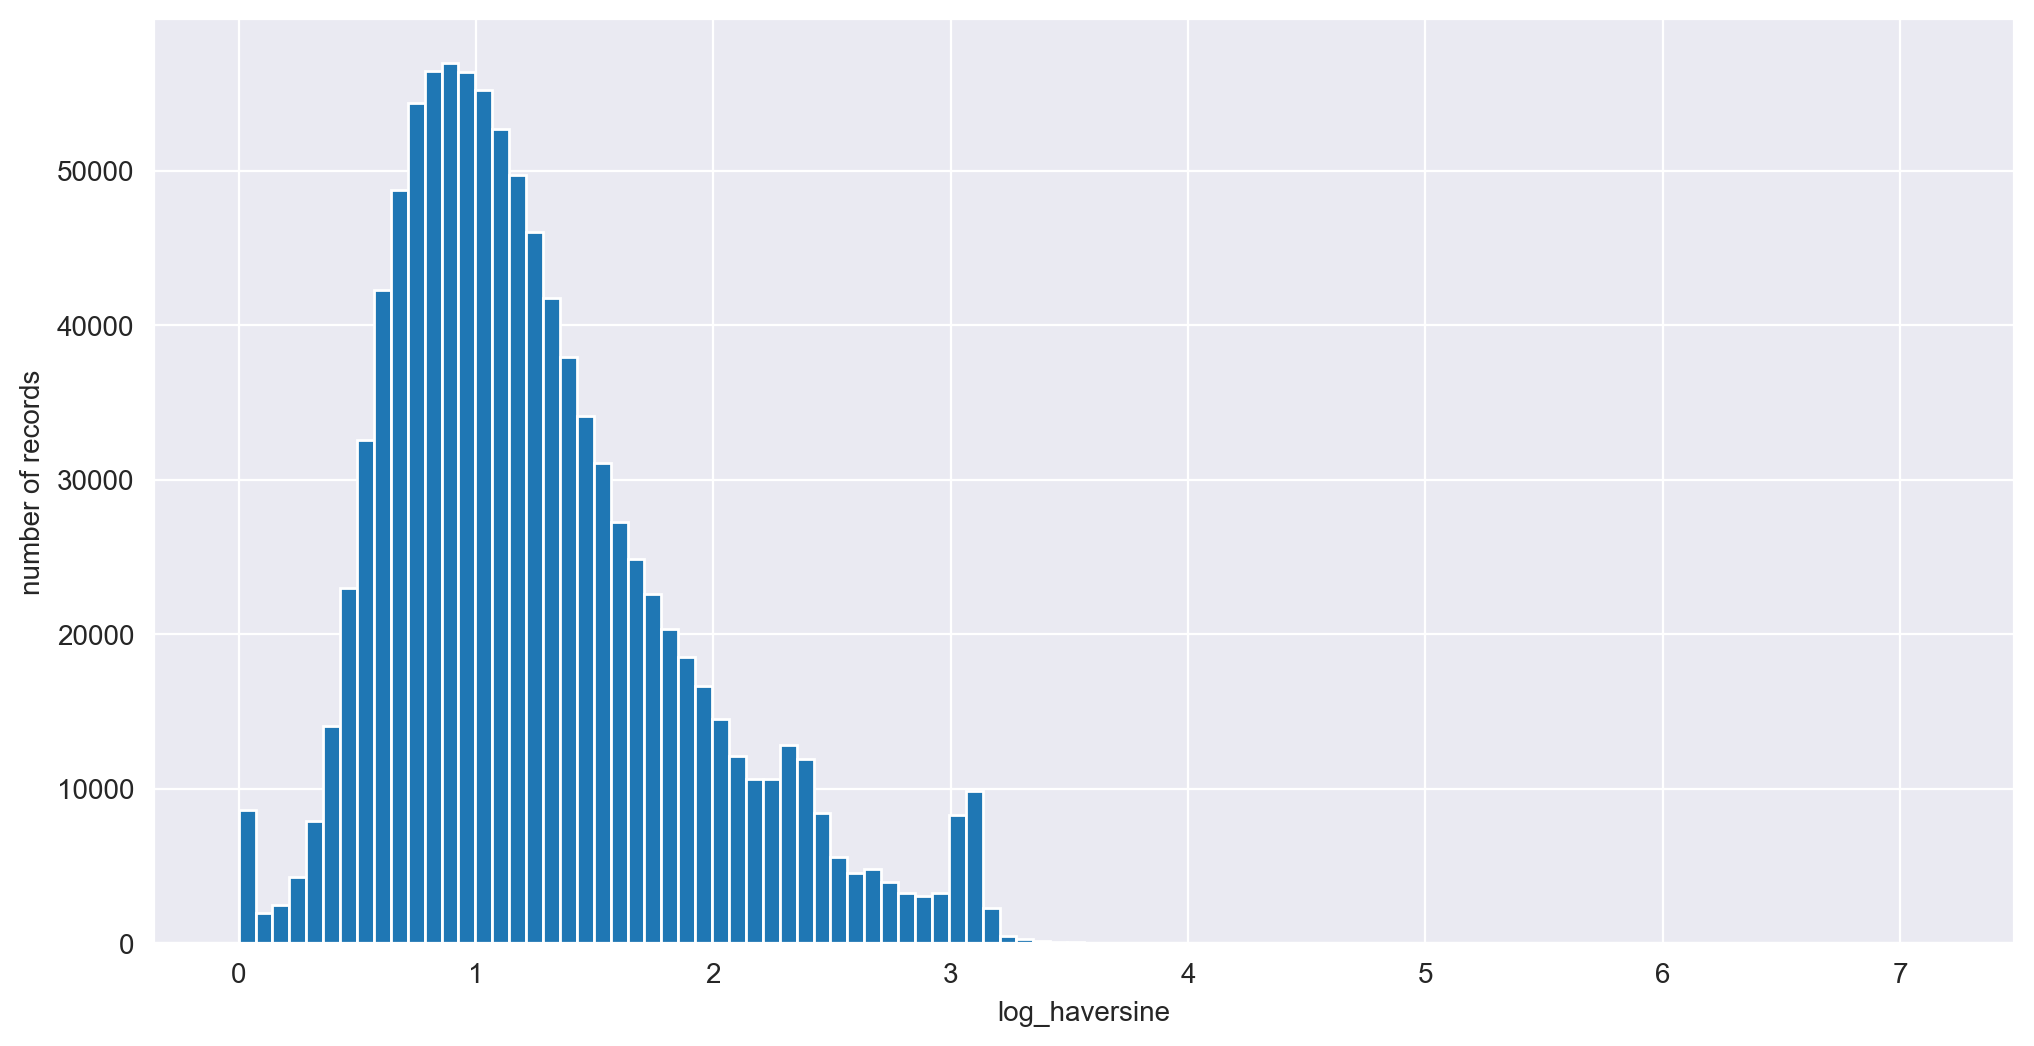

In [1508]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.hist(train_sample[['log_haversine']], bins=100)
plt.xlabel('log_haversine')
plt.ylabel('number of records')
plt.show()

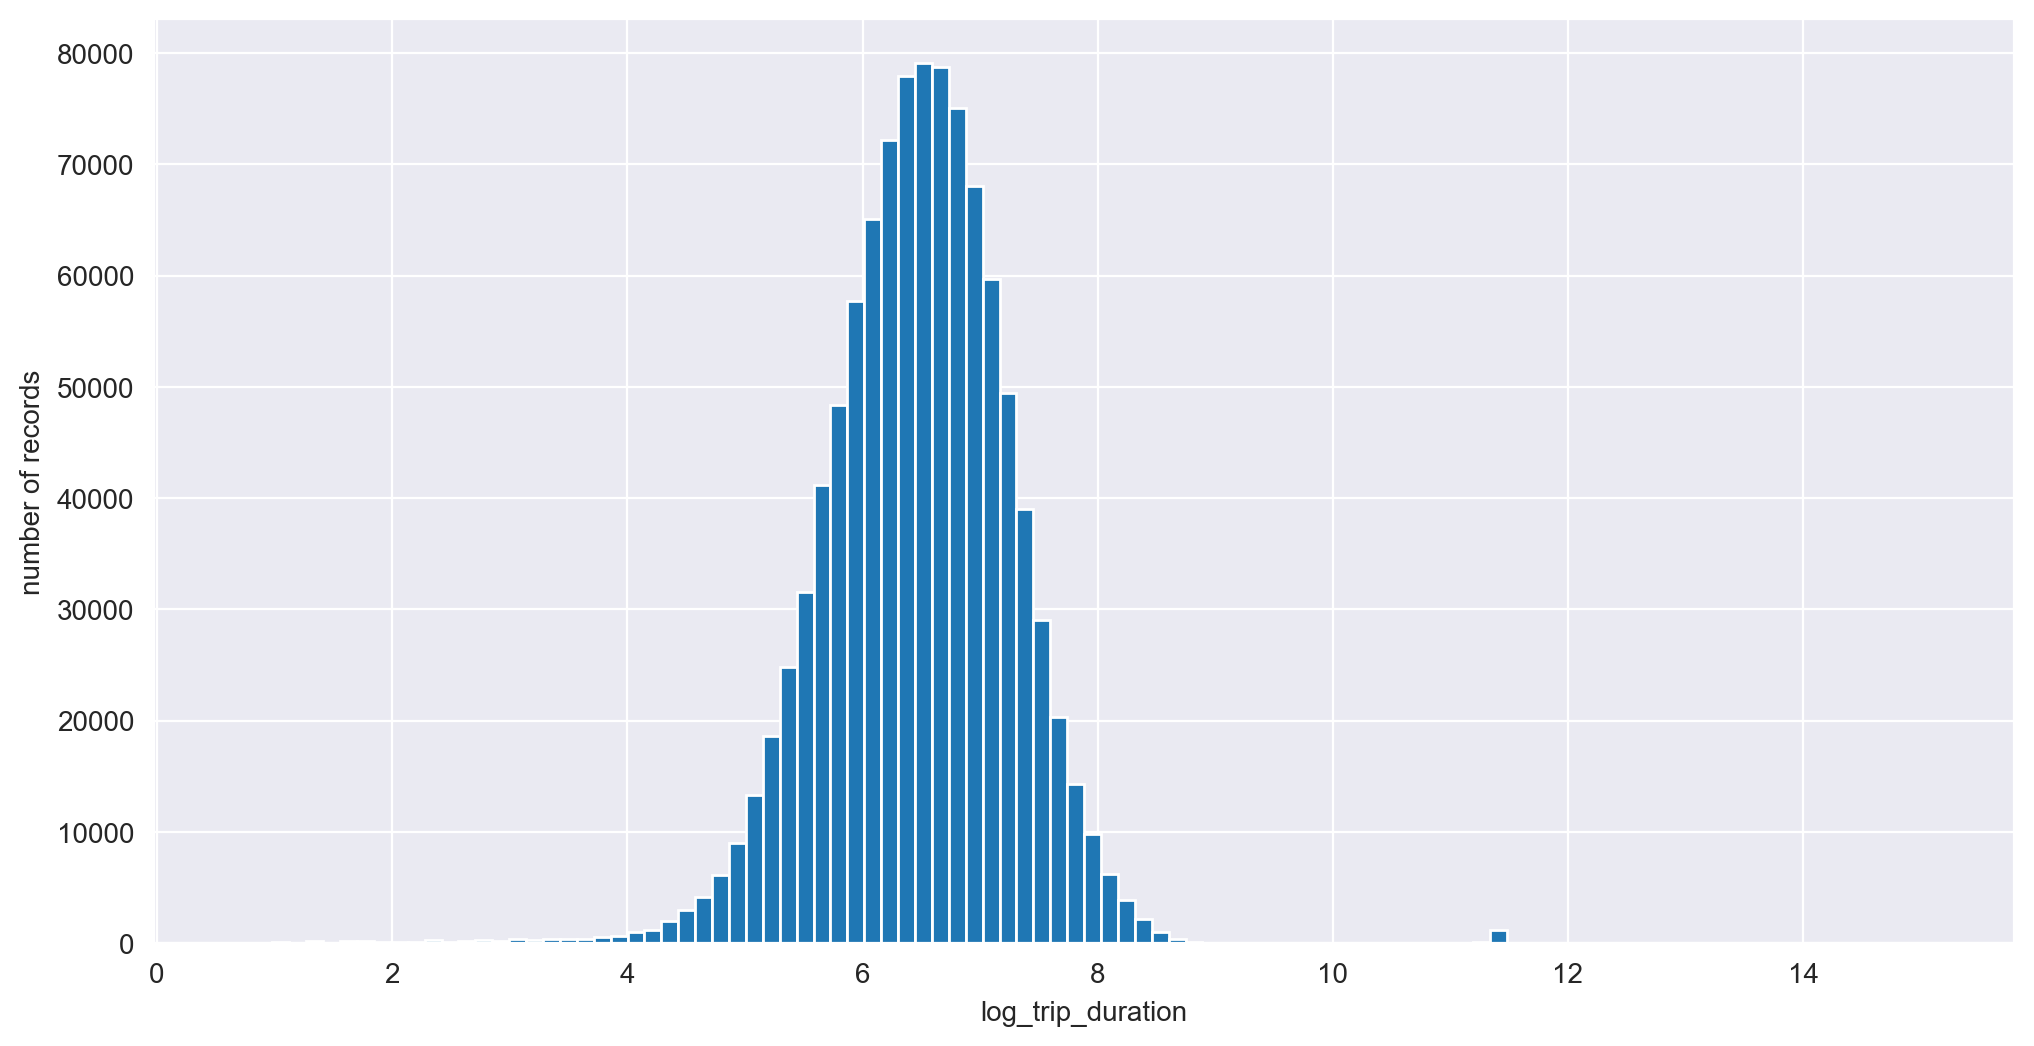

In [1509]:
plt.hist(train_sample['log_trip_duration'], bins=100)
plt.xlabel('log_trip_duration')
plt.ylabel('number of records')
plt.show()

In [1510]:
train_sample['regr'] = (y_train_pred - train_sample['log_trip_duration'])**2

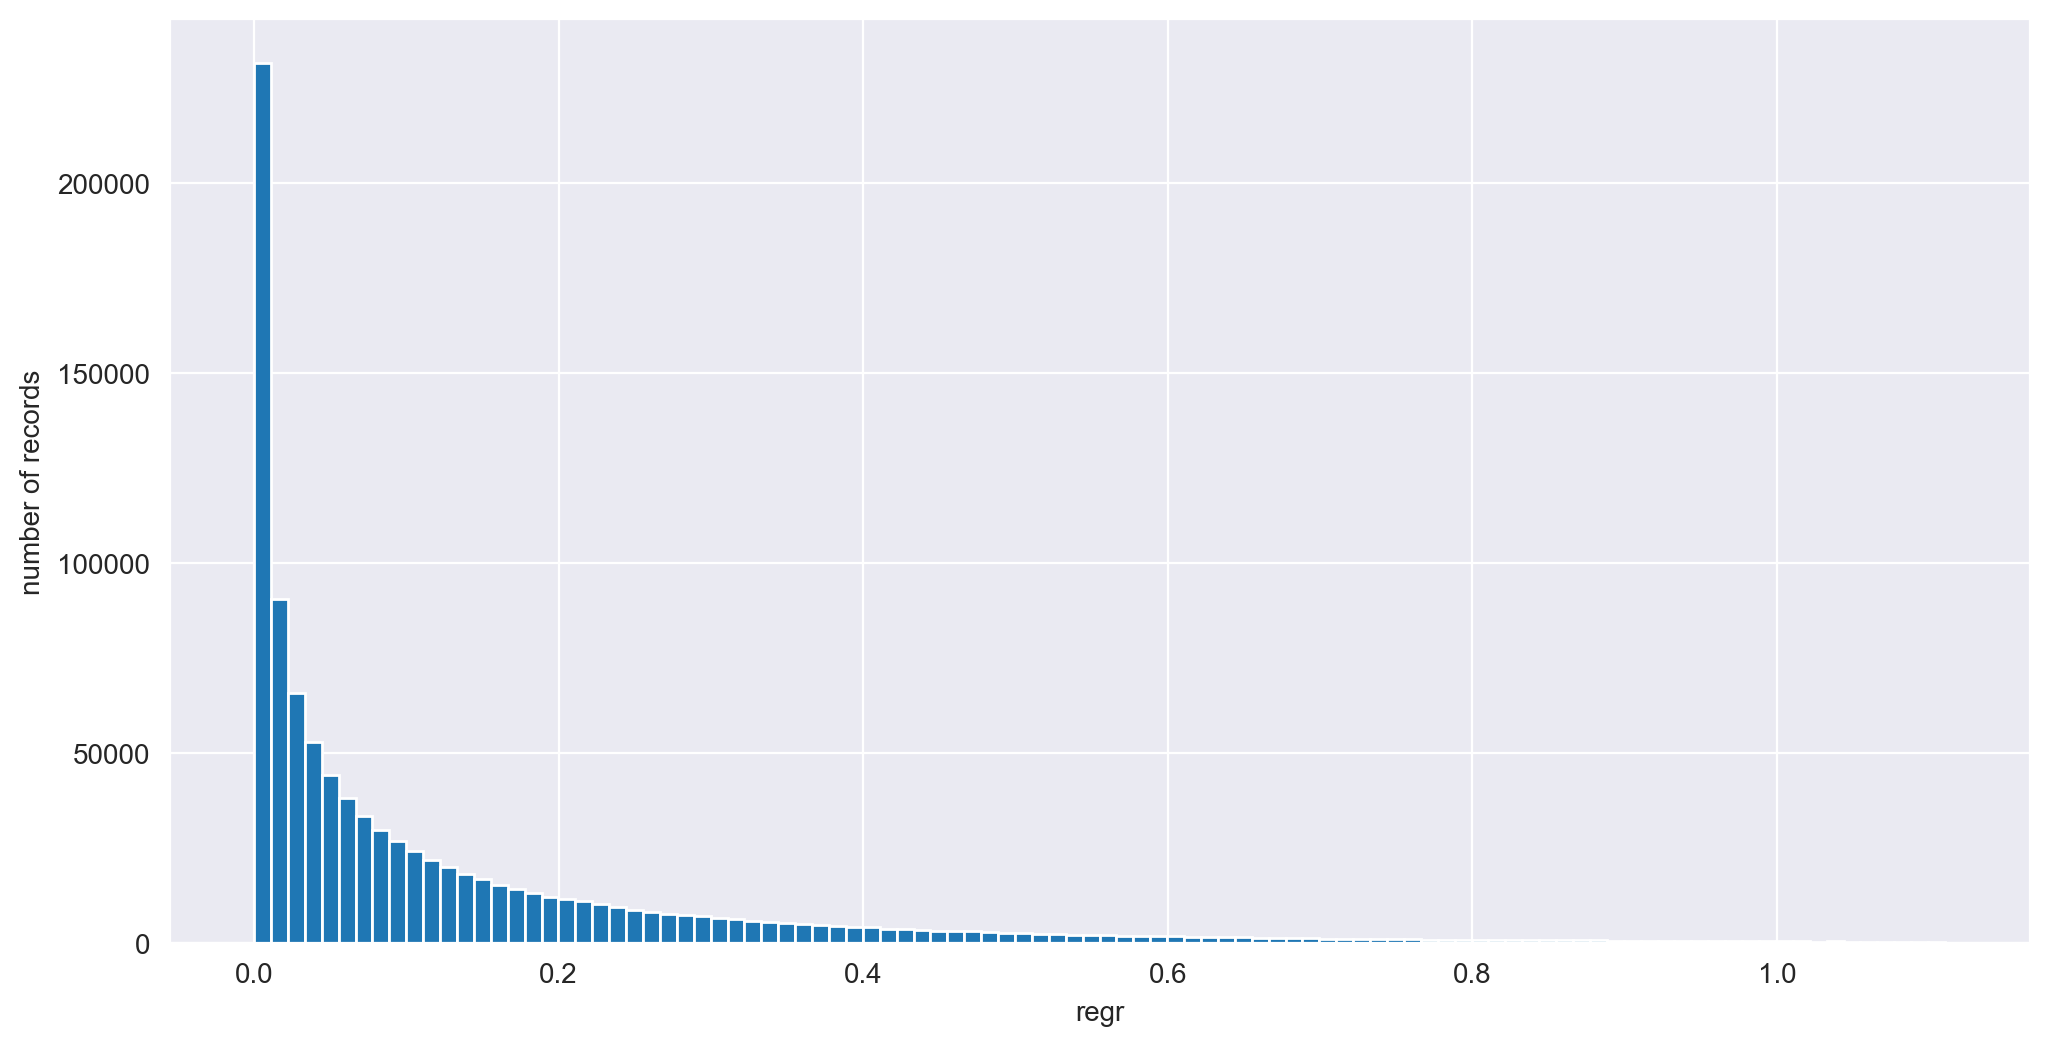

In [1511]:
x = train_sample[['regr']].quantile(q=0.975, axis=0)['regr']
plt.hist(train_sample[train_sample['regr'] < x]['regr'], bins=100)
plt.xlabel('regr')
plt.ylabel('number of records')
plt.show()

In [1512]:
x = train_sample[['log_haversine']].quantile(q=0.025, axis=0)['log_haversine']
y = train_sample[['log_haversine']].quantile(q=0.975, axis=0)['log_haversine']
train_sample = train_sample[(train_sample['log_haversine'] < y) & (train_sample['log_haversine'] > x)]
x = train_sample[['log_trip_duration']].quantile(q=0.025, axis=0)['log_trip_duration']
y = train_sample[['log_trip_duration']].quantile(q=0.975, axis=0)['log_trip_duration']
train_sample = train_sample[(train_sample['log_trip_duration'] < y) & (train_sample['log_trip_duration'] > x)]
x = train_sample[['regr']].quantile(q=0.975, axis=0)['regr']
train_sample = train_sample[train_sample['regr'] < x]


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [1513]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

train_sample['start_in_airport'] = 0
train_sample.loc[train_sample[(train_sample['pickup_latitude'] <= 40.78) & (train_sample['pickup_latitude'] >= 40.768) & (train_sample['pickup_longitude'] <= -73.86) & (train_sample['pickup_longitude'] >= -73.889)].index, 'start_in_airport'] = 1
train_sample.loc[train_sample[(train_sample['pickup_latitude'] <= 40.65) & (train_sample['pickup_latitude'] >= 40.62) & (train_sample['pickup_longitude'] <= -73.6) & (train_sample['pickup_longitude'] >= -73.8)].index, 'start_in_airport'] = 1
train_sample['end_in_airport'] = 0
train_sample.loc[train_sample[(train_sample['dropoff_latitude'] <= 40.78) & (train_sample['dropoff_latitude'] >= 40.768) & (train_sample['dropoff_longitude'] <= -73.86) & (train_sample['dropoff_longitude'] >= -73.889)].index, 'end_in_airport'] = 1
train_sample.loc[train_sample[(train_sample['dropoff_latitude'] <= 40.65) & (train_sample['dropoff_latitude'] >= 40.62) & (train_sample['dropoff_longitude'] <= -73.6) & (train_sample['dropoff_longitude'] >= -73.8)].index, 'end_in_airport'] = 1

test_sample['start_in_airport'] = 0
test_sample.loc[test_sample[(test_sample['pickup_latitude'] <= 40.78) & (test_sample['pickup_latitude'] >= 40.768) & (test_sample['pickup_longitude'] <= -73.86) & (test_sample['pickup_longitude'] >= -73.889)].index, 'start_in_airport'] = 1
test_sample.loc[test_sample[(test_sample['pickup_latitude'] <= 40.65) & (test_sample['pickup_latitude'] >= 40.62) & (test_sample['pickup_longitude'] <= -73.6) & (test_sample['pickup_longitude'] >= -73.8)].index, 'start_in_airport'] = 1
test_sample['end_in_airport'] = 0
test_sample.loc[test_sample[(test_sample['dropoff_latitude'] <= 40.78) & (test_sample['dropoff_latitude'] >= 40.768) & (test_sample['dropoff_longitude'] <= -73.86) & (test_sample['dropoff_longitude'] >= -73.889)].index, 'end_in_airport'] = 1
test_sample.loc[test_sample[(test_sample['dropoff_latitude'] <= 40.65) & (test_sample['dropoff_latitude'] >= 40.62) & (test_sample['dropoff_longitude'] <= -73.6) & (test_sample['dropoff_longitude'] >= -73.8)].index, 'end_in_airport'] = 1

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [1514]:
from sklearn.linear_model import Ridge

X_train = train_sample[['day', 'is_anomal', 'hour', 'start_in_airport', 'end_in_airport', 'traffic_jam', 'free_road', 'log_haversine', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']].copy(deep=True)
y_train = train_sample['log_trip_duration']
X_test = test_sample[['day', 'is_anomal', 'hour', 'start_in_airport', 'end_in_airport', 'traffic_jam', 'free_road', 'log_haversine', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']].copy(deep=True)
y_test = test_sample['log_trip_duration']

x = OneHotEncoder().fit_transform(train_sample[['month', 'day_of_week', 'pickup_box', 'dropoff_box']]).toarray().T
X_train['Jan'], X_train['Feb'], X_train['Mar'], X_train['Apr'], X_train['May'], X_train['Jun'], X_train['Mon'], X_train['Tue'], X_train['Wed'], X_train['Thu'], X_train['Fri'], X_train['Sat'], X_train['Sun'], \
    X_train['pickup_box_-1'], X_train['pickup_box_1'], X_train['pickup_box_2'], X_train['pickup_box_3'], X_train['pickup_box_4'], X_train['pickup_box_5'], X_train['pickup_box_6'], X_train['pickup_box_7'], X_train['pickup_box_8'], X_train['pickup_box_9'], X_train['pickup_box_10'], \
        X_train['pickup_box_11'], X_train['pickup_box_12'], \
            X_train['dropoff_box_-1'], X_train['dropoff_box_1'], X_train['dropoff_box_2'], X_train['dropoff_box_3'], X_train['dropoff_box_4'], X_train['dropoff_box_5'], X_train['dropoff_box_6'], X_train['dropoff_box_7'], X_train['dropoff_box_8'], X_train['dropoff_box_9'], X_train['dropoff_box_10'], \
                X_train['dropoff_box_11'], X_train['dropoff_box_12'] = x
x = OneHotEncoder().fit_transform(test_sample[['month', 'day_of_week', 'pickup_box', 'dropoff_box']]).toarray().T
X_test['Jan'], X_test['Feb'], X_test['Mar'], X_test['Apr'], X_test['May'], X_test['Jun'], X_test['Mon'], X_test['Tue'], X_test['Wed'], X_test['Thu'], X_test['Fri'], X_test['Sat'], X_test['Sun'], \
    X_test['pickup_box_-1'], X_test['pickup_box_1'], X_test['pickup_box_2'], X_test['pickup_box_3'], X_test['pickup_box_4'], X_test['pickup_box_5'], X_test['pickup_box_6'], X_test['pickup_box_7'], X_test['pickup_box_8'], X_test['pickup_box_9'], X_test['pickup_box_10'], \
        X_test['pickup_box_11'], X_test['pickup_box_12'], \
            X_test['dropoff_box_-1'], X_test['dropoff_box_1'], X_test['dropoff_box_2'], X_test['dropoff_box_3'], X_test['dropoff_box_4'], X_test['dropoff_box_5'], X_test['dropoff_box_6'], X_test['dropoff_box_7'], X_test['dropoff_box_8'], X_test['dropoff_box_9'], X_test['dropoff_box_10'], \
                X_test['dropoff_box_11'], X_test['dropoff_box_12'], = x

X_train['day'] = StandardScaler().fit_transform(X_train[['day']])
X_train['hour'] = StandardScaler().fit_transform(X_train[['hour']])
X_test['day'] = StandardScaler().fit_transform(X_test[['day']])
X_test['hour'] = StandardScaler().fit_transform(X_test[['hour']])

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("RMSLE on test sample:", rmsle(y_test, y_pred))
print("RMSLE on train sample:", rmsle(y_train, y_train_pred))
print("Best RMSLE const:", rmsle_best_const)

RMSLE on test sample: 0.48128566269068607
RMSLE on train sample: 0.33056198405084924
Best RMSLE const: 0.7957592365411509


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [1515]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('До кодирования:', len(['day', 'is_anomal', 'hour', 'start_in_airport', 'end_in_airport', 'log_haversine', 'pickup_box', 'dropoff_box', 'passenger_count', 'month', 'day_of_week']))
print('После кодирования:', len(X_train.keys()))

До кодирования: 11
После кодирования: 50


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [1516]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

# train_sample, test_sample = train_test_split(train, test_size=0.3, train_size=0.7, random_state=10)

model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("RMSLE on test sample:", rmsle(y_test, y_pred))
print("RMSLE on train sample:", rmsle(y_train, y_train_pred))
print("Best RMSLE const:", rmsle_best_const)

RMSLE on test sample: 0.7942946933704645
RMSLE on train sample: 0.5954468118776967
Best RMSLE const: 0.7957592365411509


Очевидно, что Ridge растащила.

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [1517]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8, random_state=10)

In [1518]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 2, 10)
model = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
print(alpha := model.fit(X_val, y_val).best_params_['alpha'])

4.6415888336127775


In [1519]:
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("RMSLE on test sample:", rmsle(y_test, y_pred))
print("RMSLE on train sample:", rmsle(y_train, y_train_pred))
print("Best RMSLE const:", rmsle_best_const)

RMSLE on test sample: 0.4812605329418101
RMSLE on train sample: 0.33065732860169644
Best RMSLE const: 0.7957592365411509


In [1520]:
alphas = np.logspace(-2, 2, 10)
model = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
x = model.fit(X_val, y_val)
print(x.best_params_['alpha'])

0.01


In [1521]:
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("RMSLE on test sample:", rmsle(y_test, y_pred))
print("RMSLE on train sample:", rmsle(y_train, y_train_pred))
print("Best RMSLE const:", rmsle_best_const)

RMSLE on test sample: 0.5035075640500443
RMSLE on train sample: 0.3511663234365758
Best RMSLE const: 0.7957592365411509


Сохраните наилучшее значение, как бенчмарк на будущее

In [1522]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = 0.4812605329418101

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

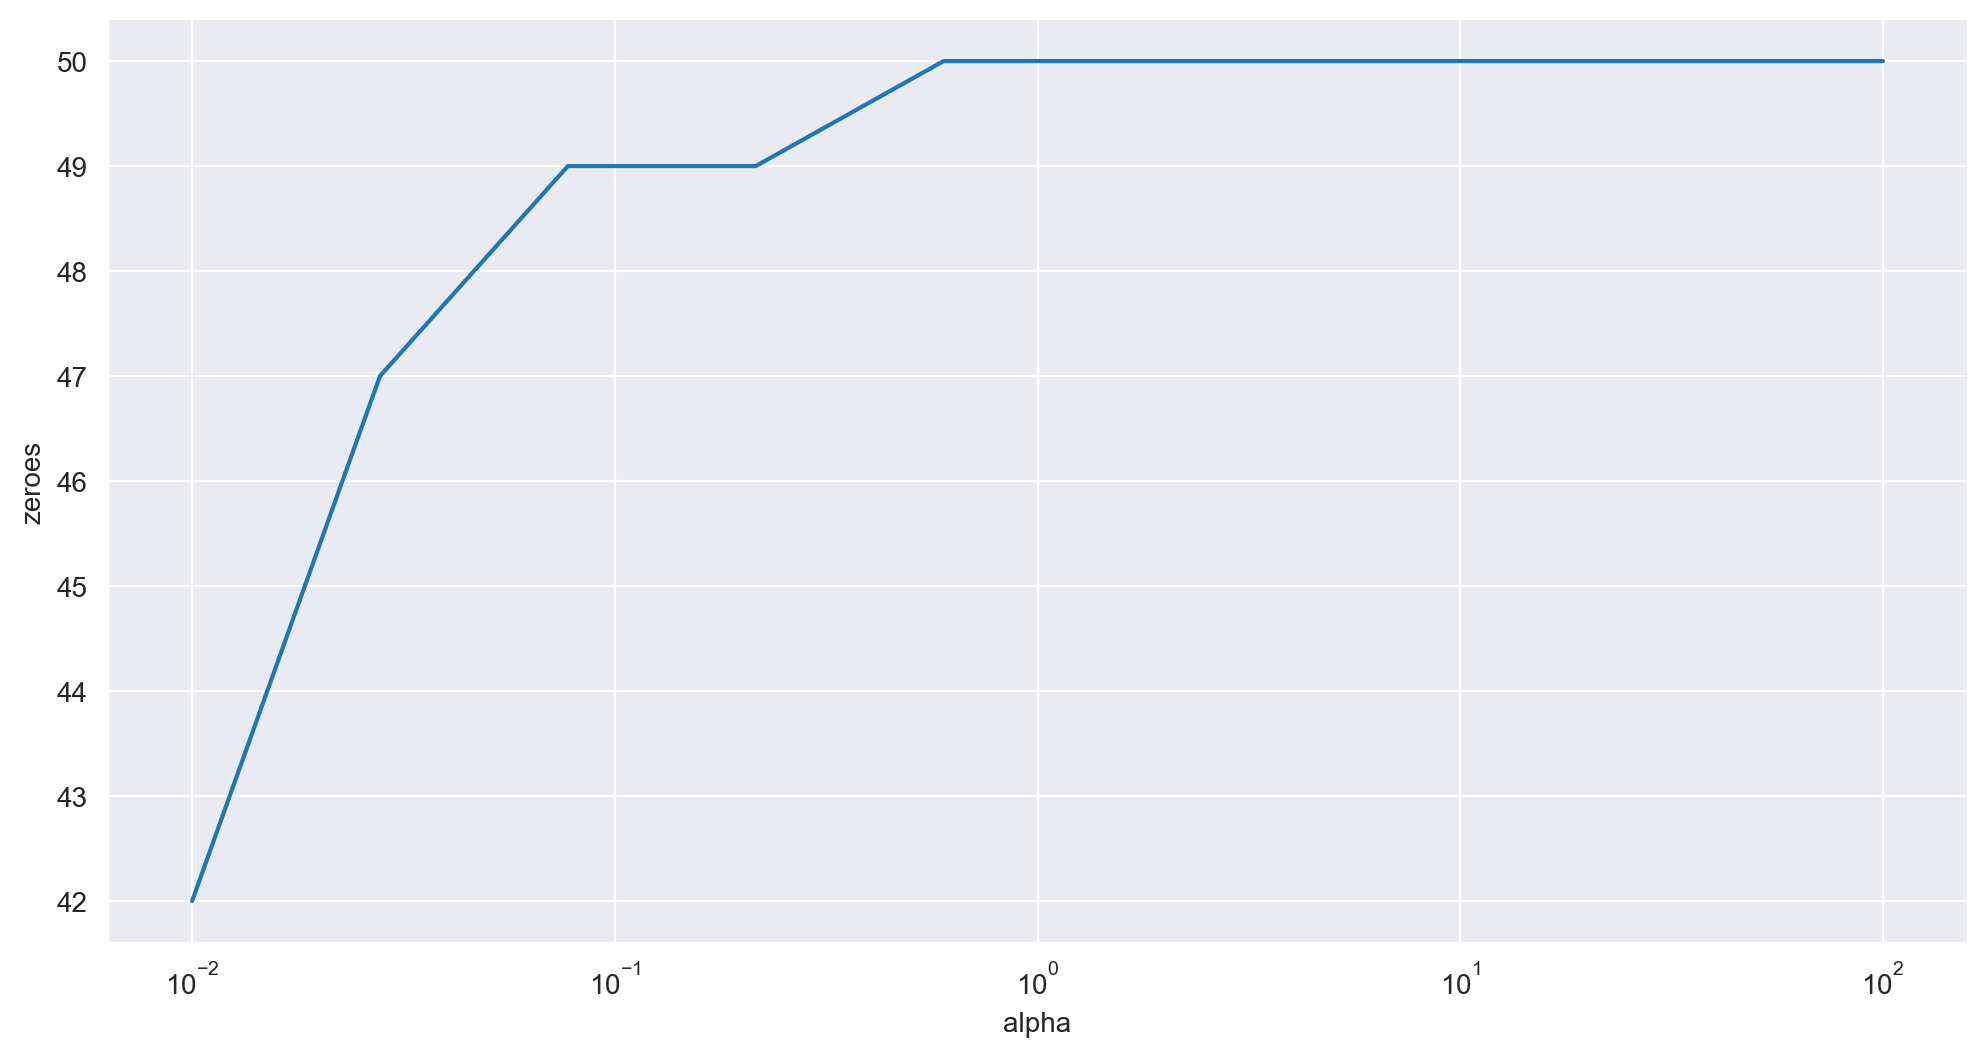

In [1523]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
zeroes = []
for x in alphas:
    model = Lasso(alpha=x)
    model.fit(X_train, y_train)
    zeroes.append(len(model.coef_) - np.count_nonzero(model.coef_))
plt.plot(alphas, zeroes)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('zeroes')
plt.show()

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [1528]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

d = dict()
for x in set(train_sample['dropoff_box'].values):
    for y in set(train_sample['pickup_box'].values):
        d[(x, y)] = train_sample[(train_sample['dropoff_box'] == x) & (train_sample['pickup_box'] == y)].shape[0]
a = list((d[x], x) for x in d)
a = sorted(a)
for x in a[100:]:
    _, y = x
    X_train[f'{y}'] = 0
    X_val[f'{y}'] = 0
    X_test[f'{y}'] = 0
        
    X_train.loc[X_train[(X_train[f'dropoff_box_{str(y[0])}'] == 1) & (X_train[f'pickup_box_{str(y[1])}'] == 1)].index, f'{y}'] = 1
    X_val.loc[X_val[(X_val[f'dropoff_box_{str(y[0])}'] == 1) & (X_val[f'pickup_box_{str(y[1])}'] == 1)].index, f'{y}'] = 1
    X_test.loc[X_test[(X_test[f'dropoff_box_{str(y[0])}'] == 1) & (X_test[f'pickup_box_{str(y[1])}'] == 1)].index, f'{y}'] = 1
for x in a[:100]:
    _, y = x
    X_train[f'{y}'] = 0
    X_val[f'{y}'] = 0
    X_test[f'{y}'] = 0
    X_train.loc[X_train[(X_train[f'dropoff_box_{str(y[0])}'] == 1) & (X_train[f'pickup_box_{str(y[1])}'] == 1)].index, f'{y}'] = -1
    X_val.loc[X_val[(X_val[f'dropoff_box_{str(y[0])}'] == 1) & (X_val[f'pickup_box_{str(y[1])}'] == 1)].index, f'{y}'] = -1
    X_test.loc[X_test[(X_test[f'dropoff_box_{str(y[0])}'] == 1) & (X_test[f'pickup_box_{str(y[1])}'] == 1)].index, f'{y}'] = -1

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [1529]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("RMSLE on test sample:", rmsle(y_test, y_pred))
print("RMSLE on train sample:", rmsle(y_train, y_train_pred))
print("Best RMSLE const:", rmsle_best_const)

RMSLE on test sample: 0.4736126362887112
RMSLE on train sample: 0.3228584836604835
Best RMSLE const: 0.7957592365411509


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [1526]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [1527]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [1376]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

<img src="https://media1.tenor.com/m/HleFU8PrawUAAAAC/sigh-ladybug.gif">